In [1]:
import platform, sys, os, shutil
import packaging.version as pv
import time

COLAB_ENV = False
try:
    from google.colab import files
    from google.colab import drive
    drive.mount('/content/drive/')
    print('Google Colab environment detected. Mounted Google Drive.')
    COLAB_ENV = True
except ImportError:
    print('This is not Google Colab.')

python_version=platform.python_version()
print('Python version:', python_version)

if pv.parse(python_version) < pv.parse("3.0.0"):
    print("Python3 is needed!")
    print("How to fix: Runtime/Change_runtime_type/Python 3")
    sys.exit()

try:
    #from dolfin import *
    #from dolfin import __version__ as dolfin_version
    #import mshr
    import dolfinx
    import ufl
    from dolfinx import mesh, fem, io
    from dolfinx.fem.petsc import LinearProblem
    from dolfinx.fem.petsc import assemble_matrix, assemble_vector
    from mpi4py import MPI
    from petsc4py import PETSc
    import numpy as np
    import matplotlib.pyplot as plt
    from matplotlib import __version__ as mpl_version
    import pandas as pd
    from tqdm import tqdm
    import scipy.optimize as opt
    from scipy.stats import norm as sp_norm
    from scipy.integrate import quad
    from scipy.integrate import simpson
    from scipy.signal import find_peaks
    from scipy import __version__ as sp_version
    from scipy.optimize import fsolve
    import mpmath
    import openturns as ot
    from sklearn.neighbors import KernelDensity
    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import r2_score
    from tabulate import tabulate
    #import plotly.graph_objs as go
    #import plotly.io as pio
    from datetime import datetime
    import re
    import csv
    import json
    import seaborn as sns
    from matplotlib.gridspec import GridSpec
except ImportError as e:
    #!wget "https://fem-on-colab.github.io/releases/fenics-install-release-real.sh" -O "/tmp/fenics-install.sh" && bash "/tmp/fenics-install.sh"
    #from dolfin import *
    #from dolfin import __version__ as dolfin_version
    #import mshr
    !wget "https://fem-on-colab.github.io/releases/fenicsx-install-release-real.sh" -O "/tmp/fenicsx-install.sh" && bash "/tmp/fenicsx-install.sh"
    import dolfinx
    import ufl
    from dolfinx import mesh, fem, io
    from dolfinx.fem.petsc import LinearProblem
    from dolfinx.fem.petsc import assemble_matrix, assemble_vector
    from mpi4py import MPI
    from petsc4py import PETSc
    import numpy as np
    import matplotlib.pyplot as plt
    from matplotlib import __version__ as mpl_version
    import pandas as pd
    from tqdm import tqdm
    import scipy.optimize as opt
    from scipy.stats import norm as sp_norm
    from scipy.integrate import quad
    from scipy.integrate import simpson
    from scipy.signal import find_peaks
    from scipy.optimize import fsolve
    from scipy import __version__ as sp_version
    import mpmath
    !pip install openturns
    import openturns as ot
    !pip install scikit-learn
    from sklearn.neighbors import KernelDensity
    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import r2_score
    from tabulate import tabulate
    #!pip install plotly
    #!pip install kaleido
    #import plotly.graph_objs as go
    #import plotly.io as pio
    from datetime import datetime
    import re
    import csv
    import json
    import seaborn as sns
    from matplotlib.gridspec import GridSpec

#try:
#    import gmsh
#except ImportError:
#    !wget "https://fem-on-colab.github.io/releases/gmsh-install.sh" -O "/tmp/gmsh-install.sh" && bash "/tmp/gmsh-install.sh"
#    import gmsh

from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.rc('axes', labelsize=15)
plt.rc('lines', linewidth=3)

from IPython.display import clear_output, display

import warnings
warnings.filterwarnings("ignore")

#ot.Log.Show(ot.Log.NONE)

#set_log_level(30)
#set_log_level(LogLevel.ERROR)

#parameters['allow_extrapolation'] = True
#parameters["form_compiler"]["cpp_optimize"] = True
#parameters["form_compiler"]["optimize"] = True
#parameters["form_compiler"]["quadrature_degree"] = 3
#parameters['form_compiler']['representation'] = 'uflacs'
#parameters['linear_algebra_backend'] = "PETSc"

print('numpy version:', np.__version__)
print('scipy version:', sp_version)
print('matplotlib version:', mpl_version)
#print('dolfin version:', dolfin_version)
#print('gmsh version:', gmsh.__version__)
print('mpmath version:', mpmath.__version__)

try:
    #from ILT import *
    from Functions_NMR import *
    #from FEM_NMR import *
    #from SemiA_Sphere_NMR import *
    #from Conv_NMR import *
    #from ND_FEM_NMR import *
    from pytwalk import pytwalk
    from SemiA_Sphere_NMR_dimensionless import *
    from ND_BT_FENICSX import *
except ImportError:
    #!wget 'https://raw.githubusercontent.com/smoralesc91/NMR_FEM/main/Codes/ILT.py'
    !wget 'https://raw.githubusercontent.com/smoralesc91/NMR_FEM/main/Codes/Functions_NMR.py'
    #!wget 'https://raw.githubusercontent.com/smoralesc91/NMR_FEM/main/Codes/FEM_NMR.py'
    #!wget 'https://raw.githubusercontent.com/smoralesc91/NMR_FEM/main/Codes/SemiA_Sphere_NMR.py'
    #!wget 'https://raw.githubusercontent.com/smoralesc91/NMR_FEM/main/Codes/Conv_NMR.py'
    #!wget 'https://raw.githubusercontent.com/smoralesc91/NMR_FEM/main/Codes/ND_FEM_NMR.py'
    !wget 'https://raw.githubusercontent.com/smoralesc91/NMR_FEM/main/Codes/pytwalk.py'
    !wget 'https://raw.githubusercontent.com/smoralesc91/NMR_FEM/main/Codes/SemiA_Sphere_NMR_dimensionless.py'
    !wget 'https://raw.githubusercontent.com/smoralesc91/NMR_FEM/main/Codes/ND_BT_FENICSX.py'

    # Fix for ImportError: cannot import name 'mat' from 'numpy'
    # This happens because 'mat' was deprecated and removed in NumPy 2.0.0+.
    # We will patch the downloaded pytwalk.py file to replace 'mat' with 'asmatrix' in the import statement.
    pytwalk_file_path = 'pytwalk.py'
    if os.path.exists(pytwalk_file_path):
        with open(pytwalk_file_path, 'r') as f:
            content = f.read()

        # Replace 'mat' with 'asmatrix' in the import line.
        # This ensures the module can be imported successfully.
        modified_content = content.replace(
            'from numpy import ones, zeros, cumsum, shape, mat, cov, mean, ceil, matrix, sqrt',
            'from numpy import ones, zeros, cumsum, shape, asmatrix, cov, mean, ceil, matrix, sqrt'
        )

        with open(pytwalk_file_path, 'w') as f:
            f.write(modified_content)
        print("Patched pytwalk.py to replace 'mat' with 'asmatrix' in import statement.")
    else:
        print(f"Warning: {pytwalk_file_path} not found for patching. pytwalk import might fail.")

    #from ILT import *
    from Functions_NMR import *
    #from FEM_NMR import *
    #from SemiA_Sphere_NMR import *
    #from Conv_NMR import *
    #from ND_FEM_NMR import *
    from pytwalk import pytwalk # Try importing again after patching
    from SemiA_Sphere_NMR_dimensionless import *
    from ND_BT_FENICSX import *

#print('ILT version:', ilt.__version__)
print('Functions_NMR version:', NMR_Functions.__version__)
#print('FEM_NMR version:', NMR_FEM.__version__)
#print('SemiA_Sphere_NMR version:', NMR_SemiA_sphere.__version__)
#print('Conv_NMR version:', NMR_Conventional.__version__)
#print('ND_FEM_NMR version:', ND_BT_FEM.__version__)
print('SemiA_Sphere_NMR_dimensionless version:', NMR_SemiA_sphere_dimless.__version__)

Mounted at /content/drive/
Google Colab environment detected. Mounted Google Drive.
Python version: 3.12.12
--2026-01-15 20:17:07--  https://fem-on-colab.github.io/releases/fenicsx-install-release-real.sh
Resolving fem-on-colab.github.io (fem-on-colab.github.io)... 185.199.108.153, 185.199.111.153, 185.199.109.153, ...
Connecting to fem-on-colab.github.io (fem-on-colab.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4339 (4.2K) [application/x-sh]
Saving to: ‘/tmp/fenicsx-install.sh’

/tmp/fenicsx-instal 100%[===================>]   4.24K  --.-KB/s    in 0s      

2026-01-15 20:17:11 (40.3 MB/s) - ‘/tmp/fenicsx-install.sh’ saved [4339/4339]

+ INSTALL_PREFIX=/usr/local
++ echo /usr/local
++ awk -F/ '{print NF-1}'
+ INSTALL_PREFIX_DEPTH=2
+ PROJECT_NAME=fem-on-colab
+ SHARE_PREFIX=/usr/local/share/fem-on-colab
+ FENICSX_INSTALLED=/usr/local/share/fem-on-colab/fenicsx.installed
+ [[ ! -f /usr/local/share/fem-on-colab/fenicsx.installed ]

# Case Study

Six case studies were conducted, varying the surface relaxivity and pore radius. Parameters such as diffusion, T2 bulk, and others, as shown in the following table, were kept constant.


| Parameter | Symbol (Units) | Case 1 | Case 2 | Case 3 | Case 4 | Case 5 | Case 6 |
| :--- | :---: | :---: | :---: | :---: | :---: | :---: | :---: |
| Radius | $r$ ($m$) | $2.25 \times 10^{-6}$ | $100 \times 10^{-6}$ | $2.25 \times 10^{-6}$ | $100 \times 10^{-6}$ | $2.25 \times 10^{-6}$ | $100 \times 10^{-6}$ |
| Surface Relaxivity | $\rho$ ($m/s$) | $1.00 \times 10^{-6}$ | $1.00 \times 10^{-6}$ | $40 \times 10^{-6}$ | $40 \times 10^{-6}$ | $20 \times 10^{-6}$ | $20 \times 10^{-6}$ |
| Diffusion Coeff. | $D_0$ ($m^2/s$) | $2.30 \times 10^{-9}$ | $2.30 \times 10^{-9}$ | $2.30 \times 10^{-9}$ | $2.30 \times 10^{-9}$ | $2.30 \times 10^{-9}$ | $2.30 \times 10^{-9}$ |
| Bulk Relaxation | $T_{2B}$ ($s$) | $2.00$ | $2.00$ | $2.00$ | $2.00$ | $2.00$ | $2.00$ |
| Start Time | $t_0$ ($s$) | $0.00$ | $0.00$ | $0.00$ | $0.00$ | $0.00$ | $0.00$ |
| Final Time | $t_f$ ($s$) | $10.00$ | $10.00$ | $10.00$ | $10.00$ | $10.00$ | $10.00$ |
| Time Step | $\Delta t$ ($s$) | $0.01$ | $0.01$ | $0.01$ | $0.01$ | $0.01$ | $0.01$ |
| Burn-in | - | $300$ | $300$ | $300$ | $300$ | $300$ | $300$ |
| SNR | - | $50$ | $50$ | $50$ | $50$ | $50$ | $50$ |
| Mesh Resolution | - | $60$ | $60$ | $60$ | $60$ | $60$ | $60$ |
| Iterations | - | $1000$ | $1000$ | $1000$ | $1000$ | $1000$ | $1000$ |

# Test 1

In [ ]:
# ==========================================
# 1. GLOBAL CONFIGURATION & CONSTANTS
# ==========================================
# Physical Constants (Defaults for simulation)
D_REF   = 2.3e-9      # [m^2/s] Self-diffusion coefficient (water)
T2B_REF = 2.0         # [s] Bulk relaxation time

# Simulation Parameters
SNR     = 50.0        # Signal-to-Noise Ratio
SIGMA_TRUE = 1.0 / SNR
DT_VALUE = 1.e-2      # [s] Temporal discretization

# MCMC Configuration (UPDATED FOR ROBUSTNESS)
TWALK_ITERATIONS = 1000  # Increased from 700 to 5000 for convergence
BURN_IN_PERIOD   = 300  # Increased burn-in to ensure stationarity

# Cases to Run
CASES = [
    #{"id": "Case1", "R": 2.25e-6,   "rho": 1.0e-6,  "tf": 10.0}, # Small Pore, Slow Relax.
    #{"id": "Case2", "R": 100e-6, "rho": 1.0e-6,  "tf": 5.0}, # Large Pore, Slow Relax.
    #{"id": "Case3", "R": 2.25e-6,   "rho": 40.0e-6, "tf": 5.0}, # Small Pore, Fast Relax.
    {"id": "Case4", "R": 100e-6, "rho": 40.0e-6, "tf": 5.0}, # Large Pore, Fast Relax.
    #{"id": "Case5", "R": 2.25e-6,   "rho": 20.0e-6, "tf": 10.0}, # Small Pore, Medium Relax.
    #{"id": "Case6", "R": 100e-6, "rho": 20.0e-6, "tf": 10.0}  # Large Pore, Medium Relax.
]

# Output Directory
if 'google.colab' in str(get_ipython()):
    OUTPUT_DIR = "/content/drive/MyDrive/Colab Notebooks/Bayesian_FEM_Results_fenicsx"
else:
    OUTPUT_DIR = "Bayesian_FEM_Results_fenicsx"

In [ ]:
# ==========================================
# 2. HELPER FUNCTIONS (DIAGNOSTICS)
# ==========================================

def compute_convergence_metrics(chain_vals):
    """Computes IAT, ESS, ACF, and Running Mean."""
    n = len(chain_vals)
    mean = np.mean(chain_vals)
    var = np.var(chain_vals)

    if var == 0: return 1.0, 1.0, np.zeros(10), np.zeros(10)

    # ACF
    lags = np.arange(min(int(n/2), 500))
    acf = []
    for lag in lags:
        cov = np.mean((chain_vals[:-lag] - mean) * (chain_vals[lag:] - mean)) if lag > 0 else var
        acf.append(cov / var)
    acf = np.array(acf)

    # IAT & ESS
    cutoff_indices = np.where(acf < 0.05)[0]
    cutoff = cutoff_indices[0] if len(cutoff_indices) > 0 else len(acf)
    iat = 1.0 + 2.0 * np.sum(acf[1:cutoff])
    iat = max(1.0, iat)
    ess = n / (2 * iat)

    # Running Mean
    iterations = np.arange(1, n + 1)
    running_mean = np.cumsum(chain_vals) / iterations

    return iat, ess, acf, running_mean

In [ ]:
# ==========================================
# 3. PLOTTING FUNCTION (CENTRALIZED)
# ==========================================
def plot_case_dashboard(data, save_path=None):
    """
    Generates the Ultimate Diagnostic Dashboard.
    Accepts a 'data' dictionary and creates 3 figures.
    """
    # --- Extract Data ---
    case_id = data.get("id", "Unknown")
    inputs  = data.get("inputs", {})
    burn    = data.get("burn_in", 0)

    # DYNAMIC DATA INTEGRITY: Read constants from inputs, default only if missing
    D_val   = inputs.get("D_ref", D_REF)
    T2B_val = inputs.get("T2B_ref", T2B_REF)
    SNR_val = inputs.get("SNR", SNR)

    # Scaling Factor (m/s -> um/s)
    SCALE_UM = 1e6

    # Unpack Arrays
    rho_true = data["rho_true"]
    rho_chain_full = data["rho_chain_full"]
    rho_chain_post = data["rho_chain_post"]
    sigma_chain_post = data["sigma_chain"][burn:]

    t     = data["t"]
    y_obs = data["y_obs"]
    s_map = data["s_map"]
    s_true= data["s_true"]

    # Unpack Scalars
    rho_map    = data["rho_map"]
    rho_median = data["rho_median"]
    rho_mean   = data["rho_mean"]
    err_pct    = data["global_error"]

    # Scale to um/s for plotting
    rho_true_um = rho_true * SCALE_UM
    rho_full_um = rho_chain_full * SCALE_UM
    rho_post_um = rho_chain_post * SCALE_UM
    rho_map_um  = rho_map * SCALE_UM
    rho_mean_um = rho_mean * SCALE_UM
    rho_med_um  = rho_median * SCALE_UM

    # --- Calculations ---
    # 1. Credible Interval (95%)
    cr_low, cr_high = np.percentile(rho_post_um, [2.5, 97.5])

    # 2. Convergence Metrics
    iat_val, ess_val, acf_vals, running_mean_um = compute_convergence_metrics(rho_post_um)

    # --- FIGURE 1: STANDARD DASHBOARD ---
    fig1 = plt.figure(figsize=(15, 10))
    gs1 = GridSpec(2, 2, figure=fig1)

    # Traceplot
    ax0 = fig1.add_subplot(gs1[0, 0])
    ax0.plot(rho_full_um, alpha=1, lw=1, color='#1f77b4', label='Chain')
    ax0.axhline(rho_true_um, color='r', ls='--', label='True')
    ax0.axvline(burn, color='gray', ls=':', lw=2, label='Burn-in cut')
    ax0.set_title(f"{case_id}: Rho Traceplot")
    ax0.set_ylabel(r"Rho [$\mu m/s$]")
    ax0.set_xlabel("Iteration")
    ax0.legend()

    # Fit
    ax1 = fig1.add_subplot(gs1[0, 1])
    ax1.plot(t, y_obs, 'o', color='gray', ms=3, alpha=0.3, label='Noisy Data')
    if s_true is not None:
        ax1.plot(t, s_true, 'k-', lw=1.5, alpha=0.8, label='True Signal')
    ax1.plot(t, s_map, 'r.', ms=6, markevery=0.03, label='MAP Model')
    ax1.set_title(f"Fit (Global Err={err_pct:.3f}%)")
    ax1.legend()
    ax1.set_xlabel("Time [s]")
    ax1.set_ylabel("Normalized Signal")

    # Posterior
    ax2 = fig1.add_subplot(gs1[1, 0])
    sns.histplot(rho_post_um, bins=30, kde=True, color='skyblue', alpha=0.7, ax=ax2, stat='density')
    ax2.axvline(rho_true_um, color='r', ls='--', lw=2, label='True')
    ax2.axvline(rho_map_um, color='k', ls='-', label=f'MAP: {rho_map_um:.2f}')
    ax2.set_title("Rho Posterior")
    ax2.set_xlabel(r"Rho [$\mu m/s$]")

    # Prior
    ax3 = fig1.add_subplot(gs1[1, 1])
    rng_p = np.random.default_rng(42)
    alpha_s = rng_p.uniform(1e-4, 20.0, 10000)
    rho_s_um = (alpha_s * np.sqrt(D_val / T2B_val)) * SCALE_UM
    sns.histplot(rho_s_um, bins=50, kde=True, color='lightgreen', alpha=0.7, ax=ax3, stat='density')
    ax3.axvline(rho_true_um, color='r', ls='--', lw=2, label='True')
    ax3.set_title("Rho Prior")
    ax3.set_xlabel(r"Rho [$\mu m/s$]")

    plt.tight_layout()
    if save_path: plt.savefig(os.path.join(save_path, "plot_dashboard_enhanced.png"), dpi=150)
    plt.show()

    # --- FIGURE 2: INFERENCE (CI & JOINT) ---
    fig2 = plt.figure(figsize=(15, 6))
    gs2 = GridSpec(1, 2, figure=fig2)

    # Posterior with CI
    ax_ci = fig2.add_subplot(gs2[0, 0])
    sns.histplot(rho_post_um, bins=30, kde=True, color='skyblue', alpha=0.5, ax=ax_ci, stat='density', edgecolor='none')
    kde_lines = ax_ci.lines
    if kde_lines:
        kx, ky = kde_lines[0].get_data()
        mask = (kx >= cr_low) & (kx <= cr_high)
        ax_ci.fill_between(kx[mask], ky[mask], color='blue', alpha=0.1, label='95% CI')
    ax_ci.axvline(rho_true_um, color='r', ls='--', lw=2)
    ax_ci.axvline(cr_low, color='blue', ls=':', lw=1)
    ax_ci.axvline(cr_high, color='blue', ls=':', lw=1)
    ax_ci.set_title(f"95% CI: [{cr_low:.2f}, {cr_high:.2f}] $\mu m/s$")
    ax_ci.set_xlabel(r"Rho [$\mu m/s$]")
    ax_ci.legend()

    # Joint Distribution
    ax_joint = fig2.add_subplot(gs2[0, 1])
    ax_joint.plot(rho_post_um, sigma_chain_post, '.', color='gray', alpha=0.2, markersize=3)
    try:
        sns.kdeplot(x=rho_post_um, y=sigma_chain_post, ax=ax_joint, color='blue', levels=5, alpha=0.7)
    except: pass
    ax_joint.axvline(rho_true_um, color='r', ls='--', label='True Rho')
    ax_joint.axhline(1.0/SNR_val, color='r', ls=':', label='True Sigma')
    ax_joint.set_title(r"Joint Posterior: Rho ($\mu m/s$) vs Noise")
    ax_joint.set_xlabel(r"Rho [$\mu m/s$]")
    ax_joint.set_ylabel("Sigma")
    ax_joint.legend()

    plt.tight_layout()
    if save_path: plt.savefig(os.path.join(save_path, "plot_inference.png"), dpi=150)
    plt.show()

    # --- FIGURE 3: CONVERGENCE ---
    fig3 = plt.figure(figsize=(15, 5))
    gs3 = GridSpec(1, 2, figure=fig3)

    ax_acf = fig3.add_subplot(gs3[0, 0])
    ax_acf.plot(acf_vals, 'b-')
    ax_acf.axhline(0, color='k', lw=0.5)
    ax_acf.set_title(f"ACF (IAT $\\approx$ {iat_val:.1f})")
    ax_acf.set_xlim(0, min(len(acf_vals), 500))

    ax_rm = fig3.add_subplot(gs3[0, 1])
    iter_axis = np.arange(1, len(running_mean_um) + 1) + burn
    ax_rm.plot(iter_axis, running_mean_um, 'r-', label='Running Mean')
    ax_rm.axhline(rho_mean_um, color='k', ls='--', label='Final Mean')
    ax_rm.set_title(f"Running Mean (ESS $\\approx$ {int(ess_val)})")
    ax_rm.set_xlabel("Iteration (Post Burn-in)")
    ax_rm.set_ylabel(r"Cumulative Mean [$\mu m/s$]")

    plt.tight_layout()
    if save_path: plt.savefig(os.path.join(save_path, "plot_convergence.png"), dpi=100)
    plt.show()

In [ ]:
# ==========================================
# 4. CORE FUNCTION: RUN SINGLE CASE
# ==========================================
def run_single_case(case_params):
    start_total_time = time.time()

    # 1. Setup
    case_id = case_params["id"]
    R_true  = case_params["R"]
    rho_true= case_params["rho"]
    tf_val  = case_params["tf"]

    print(f"\n{'='*60}")
    print(f" PROCESSING {case_id}: R={R_true*1e6:.2f}um, rho={rho_true*1e6:.1f}um/s")
    print(f"{'='*60}")

    # 2. Synthetic Data (Analytical Ground Truth)
    print("-> Generating synthetic data (Semi-Analytical Reference)...")

    num_steps = int(tf_val / DT_VALUE) + 1
    t_gen = np.linspace(0.0, tf_val, num_steps)
    tau_grid = t_gen / T2B_REF

    # Capture D_REF and T2B_REF for metadata (DATA INTEGRITY FIX)
    inputs_meta = {
        "R": R_true, "rho_true": rho_true, "tf": tf_val,
        "SNR": SNR, "dt": DT_VALUE,
        "twalk_iterations": TWALK_ITERATIONS, "burn_in_period": BURN_IN_PERIOD,
        "D_ref": D_REF,   # Saving Global Ref
        "T2B_ref": T2B_REF # Saving Global Ref
    }

    # Generate Exact Signal
    _, s_gen, _, _, _, _ = NMR_SemiA_sphere_dimless(
        radius=R_true, diffusion=D_REF, rho=rho_true, T2B=T2B_REF,
        tau_array=tau_grid, n_terms=200, return_data='all'
    )
    s_gen = np.asarray(s_gen).ravel()

    rng = np.random.default_rng(42)
    y_obs = s_gen + rng.normal(0, SIGMA_TRUE, size=s_gen.shape)
    t_obs = t_gen

    # 3. Inverse Model
    def forward_fem_mcmc(alpha_cand):
        rho_cand = alpha_cand * np.sqrt(D_REF / T2B_REF)
        try:
            _, s_out = BT_fenicsx_decay(
                R_phys=R_true, D_phys=D_REF, rho_phys=rho_cand, T2B_phys=T2B_REF,
                t_start=0.0, t_final=tf_val, dt_phys=DT_VALUE,
                NUM_ELEMS=60, SOLVER_TYPE='mumps'
            )
            return s_out
        except: return np.full_like(t_obs, -10.0)

    def Energy(x):
        if not (1e-4 < x[0] < 20.0) or not (1e-5 < x[1] < 0.2): return np.inf
        s_pred = forward_fem_mcmc(x[0])
        if np.any(s_pred == -10.0): return np.inf
        resid = y_obs - s_pred
        return -(-len(y_obs)*np.log(x[1]) - 0.5*np.sum(resid**2)/x[1]**2)

    # 4. Run MCMC
    print(f"-> Starting MCMC ({TWALK_ITERATIONS} iters)...")
    # Randomized start for robustness
    x0  = np.array([np.random.uniform(0.1, 2.0), 0.05])
    xp0 = np.array([np.random.uniform(0.1, 2.0), 0.02])

    tw = pytwalk(n=2, U=Energy, Supp=lambda x: True) # Supp checked in Energy
    tw.Run(T=TWALK_ITERATIONS, x0=x0, xp0=xp0)

    # 5. Analysis & Metric Extraction
    chain = tw.Output
    burn = BURN_IN_PERIOD

    alpha_full = chain[:, 0]
    sigma_full = chain[:, 1]
    rho_full   = alpha_full * np.sqrt(D_REF/T2B_REF)

    rho_post   = rho_full[burn:]

    # MAP Estimation
    idx_map = np.argmin(chain[burn:, -1]) + burn
    rho_map = rho_full[idx_map]

    s_map = forward_fem_mcmc(alpha_full[idx_map])
    metrics = compute_error_metrics(s_gen, s_map, t=t_obs)

    # 6. Save Results
    case_dir = os.path.join(OUTPUT_DIR, case_id)
    os.makedirs(case_dir, exist_ok=True)

    # Build Data Dictionary (Memory)
    data_pack = {
        "id": case_id,
        "inputs": inputs_meta, # Contains D_REF/T2B_REF
        "burn_in": burn,
        "rho_true": rho_true,
        "rho_chain_full": rho_full,
        "rho_chain_post": rho_post,
        "sigma_chain": sigma_full,
        "t": t_obs, "y_obs": y_obs, "s_map": s_map, "s_true": s_gen,
        "rho_map": rho_map,
        "rho_mean": np.mean(rho_post),
        "rho_median": np.median(rho_post),
        "global_error": metrics["Global_Rel_Error_Pct"]
    }

    # Save Files
    # JSON with metadata
    meta_report = data_pack.copy()
    # Remove large arrays for JSON
    del meta_report["rho_chain_full"], meta_report["rho_chain_post"], meta_report["sigma_chain"]
    del meta_report["t"], meta_report["y_obs"], meta_report["s_map"], meta_report["s_true"]
    meta_report["signal_errors"] = metrics

    with open(os.path.join(case_dir, "metrics.json"), 'w') as f:
        json.dump(meta_report, f, indent=4)

    np.savetxt(os.path.join(case_dir, "chain.csv"), chain, delimiter=",", header="alpha,sigma,energy,log_post")
    np.savetxt(os.path.join(case_dir, "signals.csv"), np.column_stack((t_obs, y_obs, s_map, s_gen)), delimiter=",", header="t,y_obs,s_map,s_true")

    print(f"-> Saved to {case_dir}")

    # 7. Plot using Centralized Function (MODULARITY FIX)
    plot_case_dashboard(data_pack, save_path=case_dir)

In [ ]:
# ==========================================
# 5. LOADING FUNCTION (UPDATED)
# ==========================================
def load_case_data(case_id, base_dir=None):
    if base_dir is None:
        base_dir = "/content/drive/MyDrive/Colab Notebooks/Bayesian_FEM_Results_fenicsx" if 'google.colab' in str(get_ipython()) else "Bayesian_FEM_Results_fenicsx"

    case_path = os.path.join(base_dir, case_id)

    # Load Meta
    with open(os.path.join(case_path, "metrics.json"), 'r') as f:
        meta = json.load(f)

    inputs = meta["inputs"]

    # DYNAMIC LOAD of Constants (Fixes Data Integrity)
    D_loaded = inputs.get("D_ref", 2.3e-9)
    T2B_loaded = inputs.get("T2B_ref", 2.0)

    # Load CSVs
    chain = np.loadtxt(os.path.join(case_path, "chain.csv"), delimiter=",")
    sigs  = np.loadtxt(os.path.join(case_path, "signals.csv"), delimiter=",")

    # Reconstruct
    burn = int(inputs["burn_in_period"])
    rho_full = chain[:, 0] * np.sqrt(D_loaded / T2B_loaded)

    data = {
        "id": case_id, "inputs": inputs, "burn_in": burn,
        "rho_true": inputs["rho_true"],
        "rho_chain_full": rho_full,
        "rho_chain_post": rho_full[burn:],
        "sigma_chain": chain[:, 1],
        "t": sigs[:, 0], "y_obs": sigs[:, 1], "s_map": sigs[:, 2], "s_true": sigs[:, 3],
        "rho_map": meta["rho_map"],
        "rho_mean": meta["rho_mean"],
        "rho_median": meta["rho_median"],
        "global_error": meta["signal_errors"]["Global_Rel_Error_Pct"]
    }
    return data

Starting Optimized Bayesian Simulation...

 PROCESSING Case4: R=100.00um, rho=40.0um/s
-> Generating synthetic data (Semi-Analytical Reference)...
-> Starting MCMC (1000 iters)...
pytwalk: Running the twalk with 1000 iterations .  Thu, 15 Jan 2026, 16:04:59.
       Finish by Thu, 15 Jan 2026, 16:45.
pytwalk:         64 iterations so far. Finish by Thu, 15 Jan 2026, 16:20.
pytwalk:        256 iterations so far. Finish by Thu, 15 Jan 2026, 16:20.
pytwalk:        512 iterations so far. Finish by Thu, 15 Jan 2026, 16:20.
pytwalk:        768 iterations so far. Finish in approx. 3 min and 37 sec.
pytwalk: finished, Thu, 15 Jan 2026, 16:20:32.
-> Saved to /content/drive/MyDrive/Colab Notebooks/Bayesian_FEM_Results_fenicsx/Case4


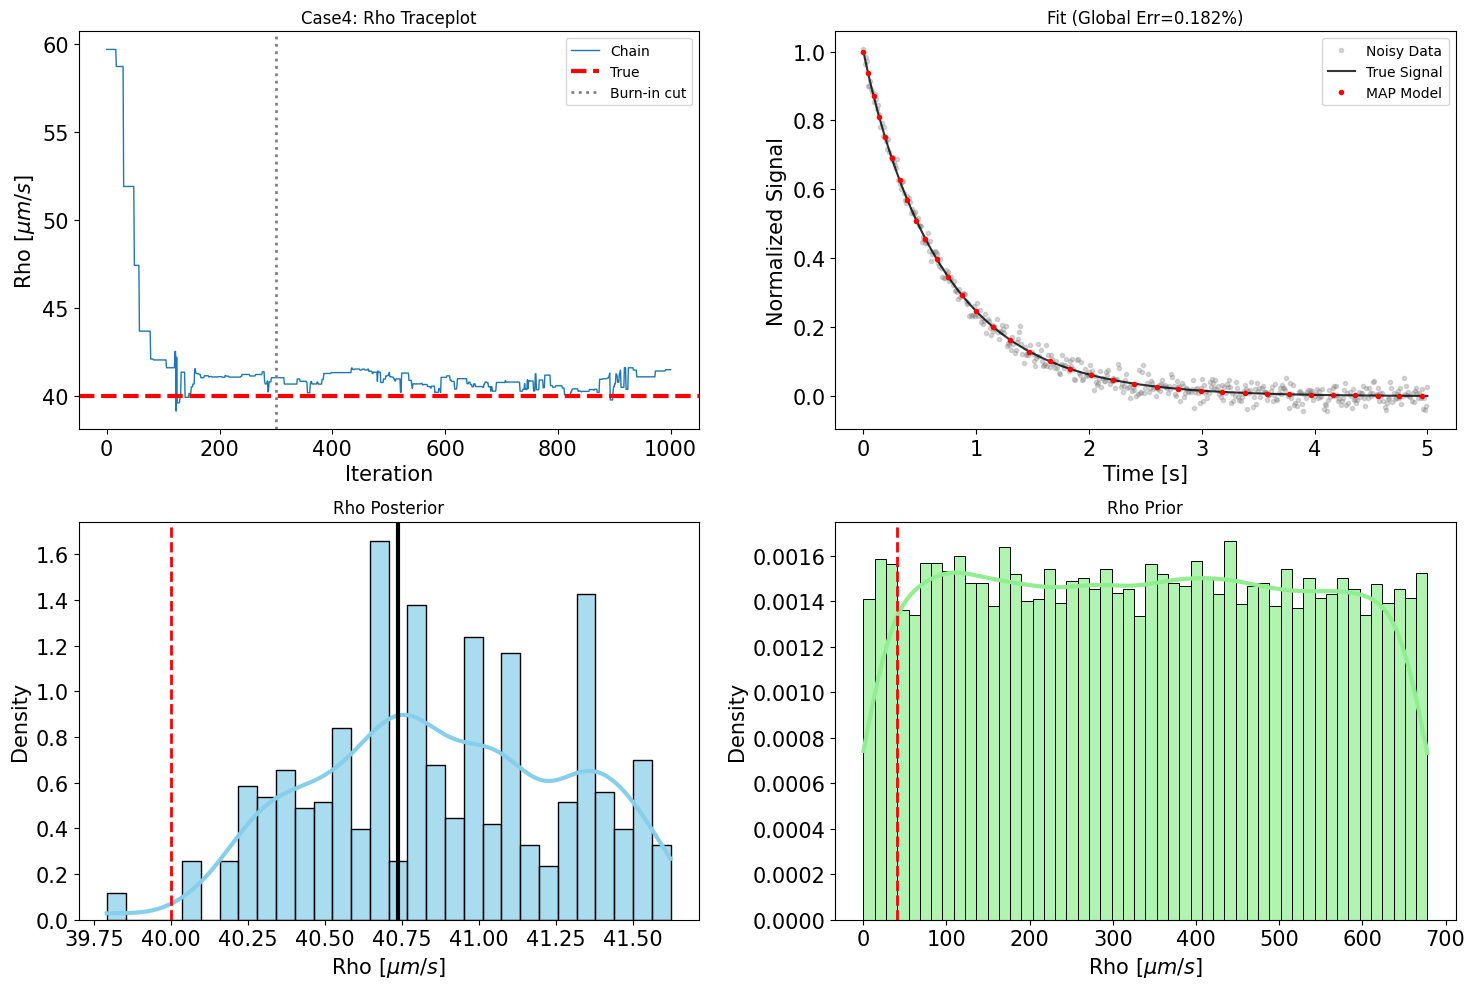

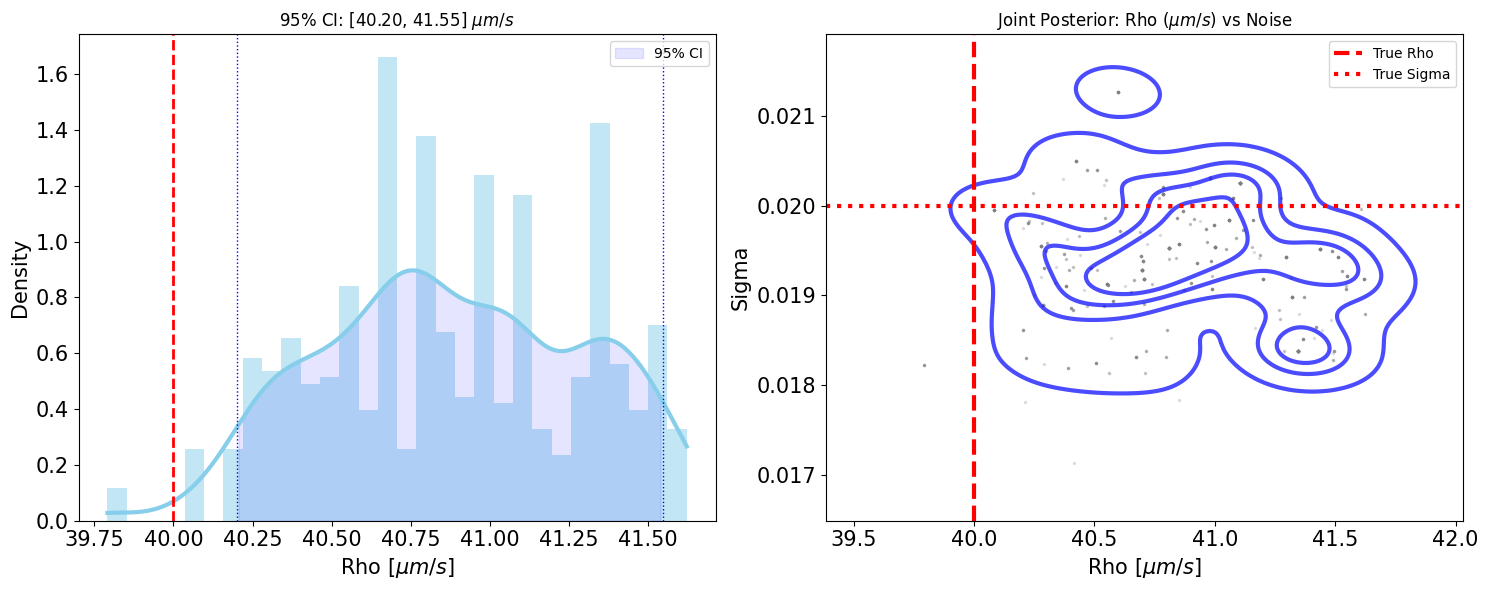

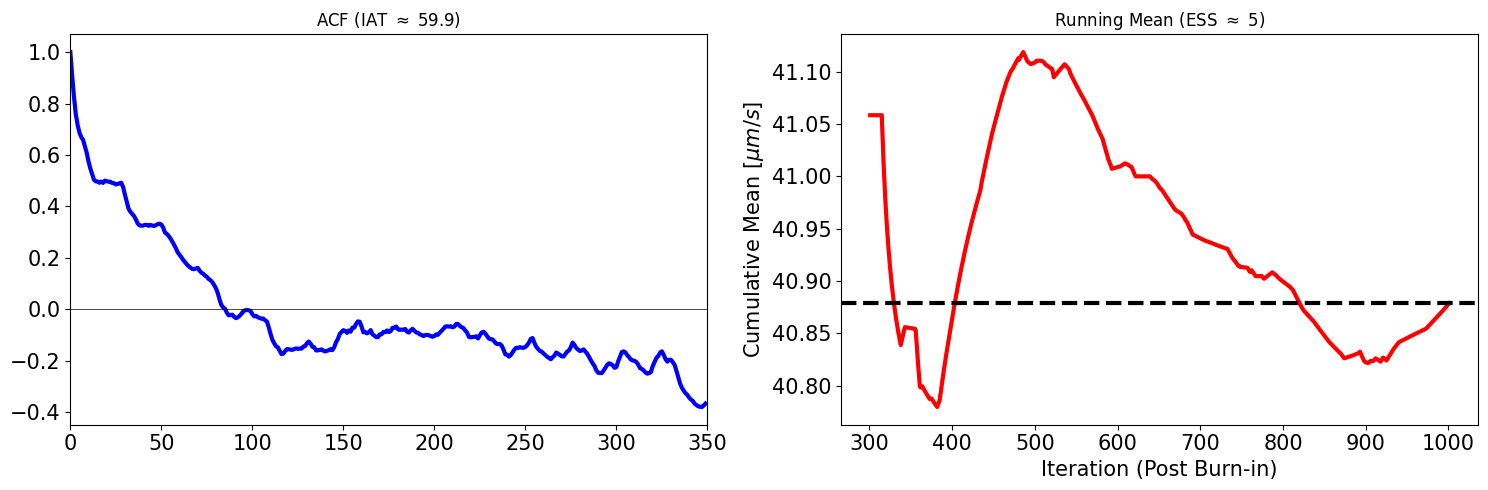

In [ ]:
print("Starting Optimized Bayesian Simulation...")
os.makedirs(OUTPUT_DIR, exist_ok=True)

for case in CASES:
  try:
    run_single_case(case)
  except Exception as e:
    print(f"Error in {case['id']}: {e}")
    import traceback
    traceback.print_exc()

# Test 2

In [21]:
# ==========================================
# 2. HELPER: CONVERGENCE DIAGNOSTICS
# ==========================================
def compute_convergence_metrics(chain_vals):
    """
    Computes Integrated Autocorrelation Time (IAT) and Effective Sample Size (ESS).
    Uses a standard summation of the ACF until it drops below a noise threshold.
    """
    n = len(chain_vals)
    mean = np.mean(chain_vals)
    var = np.var(chain_vals)

    if var == 0: return 1.0, 1.0, np.zeros(10), np.zeros(10)

    # Compute ACF
    lags = np.arange(min(int(n/2), 500)) # Limit lags for performance
    acf = []
    for lag in lags:
        cov = np.mean((chain_vals[:-lag] - mean) * (chain_vals[lag:] - mean)) if lag > 0 else var
        acf.append(cov / var)
    acf = np.array(acf)

    # Estimate IAT (Cutoff when ACF < 0.05 or negative)
    cutoff_indices = np.where(acf < 0.05)[0]
    cutoff = cutoff_indices[0] if len(cutoff_indices) > 0 else len(acf)

    # IAT = 1 + 2 * sum(rho_k)
    iat = 1.0 + 2.0 * np.sum(acf[1:cutoff])
    iat = max(1.0, iat) # Ensure IAT >= 1

    ess = n / (2 * iat) # Effective Sample Size approximation

    # Compute Running Mean
    iterations = np.arange(1, n + 1)
    running_mean = np.cumsum(chain_vals) / iterations

    return iat, ess, acf, running_mean

In [22]:
# ==========================================
# 1. GLOBAL CONFIGURATION
# ==========================================
D_REF   = 2.3e-9      # [m^2/s] Self-diffusion coefficient (water)
T2B_REF = 2.0         # [s] Bulk relaxation time
SNR     = 50.0        # Signal-to-Noise Ratio
SIGMA_TRUE = 1.0 / SNR
DT_VALUE = 1.e-2      # [s] Temporal discretization
TWALK_ITERATIONS = 10000 # Number of iterations for pytwalk
BURN_IN_PERIOD = 300   # Number of samples to discard as burn-in

# List of Requested Cases
CASES = [
    {"id": "Case1", "R": 2.25e-6,   "rho": 1.0e-6,  "tf": 10.0}, # Small Pore, Slow Relax.
    {"id": "Case2", "R": 100e-6,    "rho": 1.0e-6,  "tf": 10.0}, # Large Pore, Slow Relax.
    {"id": "Case3", "R": 2.25e-6,   "rho": 40.0e-6, "tf": 10.0}, # Small Pore, Fast Relax.
    {"id": "Case4", "R": 100e-6,    "rho": 40.0e-6, "tf": 10.0}, # Large Pore, Fast Relax.
    {"id": "Case5", "R": 2.25e-6,   "rho": 20.0e-6, "tf": 10.0}, # Small Pore, Medium Relax.
    {"id": "Case6", "R": 100e-6,    "rho": 20.0e-6, "tf": 10.0}  # Large Pore, Medium Relax.
]

# Set OUTPUT_DIR based on Colab environment
if COLAB_ENV:
    OUTPUT_DIR = "/content/drive/MyDrive/Colab Notebooks/Bayesian_FEM_Results_fenicsx"
else:
    OUTPUT_DIR = "Bayesian_FEM_Results_fenicsx"

In [23]:
# ==========================================
# 2. CORE FUNCTION (RUNS A SINGLE CASE)
# ==========================================

def run_single_case(case_params):
    """
    Executes the full Bayesian inversion workflow:
    1. Generates synthetic data using Semi-Analytical solution (Ground Truth).
    2. Inverts using FEM model via MCMC.
    3. Computes comprehensive error metrics and convergence diagnostics.
    4. Saves results and generates diagnostic plots.
    """
    start_total_time = time.time()

    # 1. Unpack Case Parameters
    case_id = case_params["id"]
    R_true  = case_params["R"]
    rho_true = case_params["rho"]
    tf_val   = case_params["tf"]

    print(f"\n{'='*60}")
    print(f" PROCESSING {case_id}: R={R_true*1e6:.2f}um, rho={rho_true*1e6:.1f}um/s")
    print(f"{'='*60}")

    # ---------------------------------------------------------
    # A. Generate Synthetic Data (Semi-Analytical Ground Truth)
    # ---------------------------------------------------------
    print("-> Generating synthetic data (Semi-Analytical Reference)...")

    # 1. Define Time Vector (Physical)
    num_steps = int(tf_val / DT_VALUE) + 1
    t_gen = np.linspace(0.0, tf_val, num_steps)

    # 2. Convert to Dimensionless Time
    tau_grid = t_gen / T2B_REF

    # 3. Calculate Dimensionless Ground Truth Parameters
    alpha_true_dimless = rho_true * np.sqrt(T2B_REF / D_REF)
    phi_R_true_dimless = R_true / np.sqrt(D_REF * T2B_REF)

    # 4. Generate Exact Signal
    _, s_gen, _, _, _, _ = NMR_SemiA_sphere_dimless(
        radius=R_true, diffusion=D_REF, rho=rho_true, T2B=T2B_REF,
        tau_array=tau_grid,
        n_terms=200,
        return_data='all'
    )
    s_gen = np.asarray(s_gen).ravel()

    # 5. Add Noise
    rng = np.random.default_rng(42)
    y_obs = s_gen + rng.normal(0, SIGMA_TRUE, size=s_gen.shape)
    t_obs = t_gen

    # ---------------------------------------------------------
    # B. Define Inverse Model (FEM Closure)
    # ---------------------------------------------------------

    # 3. Inverse Model
    def forward_fem_mcmc(alpha_cand):
        rho_cand = alpha_cand * np.sqrt(D_REF / T2B_REF)
        try:
            _, s_out = BT_fenicsx_decay(
                R_phys=R_true, D_phys=D_REF, rho_phys=rho_cand, T2B_phys=T2B_REF,
                t_start=0.0, t_final=tf_val, dt_phys=DT_VALUE,
                NUM_ELEMS=60, SOLVER_TYPE='mumps'
            )
            return s_out
        except: return np.full_like(t_obs, -10.0)

    def Supp(x):
        if not (1e-4 < x[0] < 20.0): return False
        if not (1e-5 < x[1] < 0.2):  return False
        return True

    def Energy(x):
        if not Supp(x): return np.inf
        alpha_val, sigma_val = x

        s_pred = forward_fem_mcmc(alpha_val)
        if np.any(s_pred == -10.0): return np.inf

        resid = y_obs - s_pred
        n = len(y_obs)
        log_lik = -n * np.log(sigma_val) - 0.5 * np.sum(resid**2) / sigma_val**2
        return -log_lik

    # ---------------------------------------------------------
    # C. Execute MCMC
    # ---------------------------------------------------------
    print("-> Starting MCMC sampling...")
    x0  = np.array([0.1, 0.05])
    xp0 = np.array([1.0, 0.01])
    tw = pytwalk(n=2, U=Energy, Supp=Supp)

    start_mcmc_time = time.time()
    tw.Run(T=TWALK_ITERATIONS, x0=x0, xp0=xp0)
    elapsed_mcmc = time.time() - start_mcmc_time
    print(f"-> MCMC finished in {elapsed_mcmc:.2f} s")

    # ---------------------------------------------------------
    # D. Analysis
    # ---------------------------------------------------------
    burn = BURN_IN_PERIOD
    chain = tw.Output

    # Extract Chains
    alpha_chain_full = chain[:, 0]
    rho_chain_full = alpha_chain_full * np.sqrt(D_REF/T2B_REF)

    # Stationary Distribution (Post Burn-in)
    alpha_post = chain[burn:, 0]
    sigma_post = chain[burn:, 1]
    U_post     = chain[burn:, -1]
    rho_post_phys = alpha_post * np.sqrt(D_REF/T2B_REF)

    # 1. Parameter Estimates
    # MAP (Mode)
    idx_map = np.argmin(U_post)
    alpha_map = alpha_post[idx_map]
    sigma_map = sigma_post[idx_map]
    rho_map = alpha_map * np.sqrt(D_REF / T2B_REF)

    # Mean & Median
    rho_mean = float(np.mean(rho_post_phys))
    rho_median = float(np.median(rho_post_phys))
    rho_std = float(np.std(rho_post_phys))
    rho_var = float(np.var(rho_post_phys))

    # 2. Error Quantification (Abs & Relative)
    def get_errors(estimate, truth):
        abs_err = abs(estimate - truth)
        pct_err = (abs_err / truth) * 100.0
        return abs_err, pct_err

    rho_err_abs_map, rho_err_pct_map = get_errors(rho_map, rho_true)
    rho_err_abs_mean, rho_err_pct_mean = get_errors(rho_mean, rho_true)
    rho_err_abs_med, rho_err_pct_med = get_errors(rho_median, rho_true)

    # 3. Convergence Diagnostics
    iat_val, ess_val, acf_vals, running_mean = compute_convergence_metrics(rho_post_phys)
    print(f"   [Convergence] IAT: {iat_val:.2f}, ESS: {ess_val:.2f}")

    # 4. Signal Prediction & Metrics
    s_map = forward_fem_mcmc(alpha_map)
    metrics = compute_error_metrics(y_true=s_gen, y_pred=s_map, t=t_obs)

    total_elapsed_time = time.time() - start_total_time

    # ---------------------------------------------------------
    # E. Save Results
    # ---------------------------------------------------------
    case_dir = os.path.join(OUTPUT_DIR, case_id)
    os.makedirs(case_dir, exist_ok=True)

    # 1. Detailed JSON Report
    report = {
        "case_id": case_id,
        "inputs": {
            "R": R_true, "rho_true": rho_true, "tf": tf_val,
            "SNR": SNR, "dt": DT_VALUE,
            "twalk_iterations": TWALK_ITERATIONS, "burn_in_period": BURN_IN_PERIOD,
            "dimensionless_truth": {"alpha": alpha_true_dimless, "phi_R": phi_R_true_dimless}
        },
        "recovered_map": {
            "rho": rho_map, "rho_error_abs": rho_err_abs_map, "rho_error_percent": rho_err_pct_map,
            "alpha": alpha_map, "sigma": sigma_map
        },
        "recovered_mean": {
            "rho": rho_mean, "rho_error_abs": rho_err_abs_mean, "rho_error_percent": rho_err_pct_mean
        },
        "recovered_median": {
            "rho": rho_median, "rho_error_abs": rho_err_abs_med, "rho_error_percent": rho_err_pct_med
        },
        "posterior_stats": {"rho_std": rho_std, "rho_var": rho_var},
        "convergence": {"IAT": iat_val, "ESS": ess_val},
        "signal_errors": metrics,
        "mcmc_time_s": elapsed_mcmc,
        "total_simulation_time_s": total_elapsed_time
    }

    with open(os.path.join(case_dir, "metrics.json"), 'w') as f:
        json.dump(report, f, indent=4)

    # 2. Chain CSV
    np.savetxt(os.path.join(case_dir, "chain.csv"), chain[::1, :],
               header="alpha,sigma,energy,log_posterior", delimiter=",")

    # 3. Signals CSV (Includes s_true for reference)
    signal_data = np.column_stack((t_obs, y_obs, s_map, s_gen))
    np.savetxt(os.path.join(case_dir, "signals.csv"), signal_data,
               header="time,y_obs,s_map,s_true", delimiter=",")

    # 4. Info CSV
    with open(os.path.join(case_dir, "synthetic_data_info.csv"), 'w') as f:
        f.write("parameter,value\n")
        f.write(f"case_id,{case_id}\n")
        f.write(f"alpha_true,{alpha_true_dimless}\n")
        f.write(f"phi_R_true,{phi_R_true_dimless}\n")
        f.write(f"SNR,{SNR}\n")

    # 5. Convergence TXT
    with open(os.path.join(case_dir, "convergence_stats.txt"), "w") as f:
        f.write(f"IAT: {iat_val:.4f}\nESS: {ess_val:.4f}\nIterations: {len(rho_post_phys)}\n")

    print(f"-> Results saved to: {case_dir}")

    # ---------------------------------------------------------
    # F. Plotting - Figure 1: Main Dashboard
    # ---------------------------------------------------------
    fig = plt.figure(figsize=(15, 10))
    gs = GridSpec(2, 2, figure=fig)

    # Traceplot
    ax0 = fig.add_subplot(gs[0, 0])
    ax0.plot(rho_chain_full, alpha=1, lw=1.5, label='Chain')
    ax0.axhline(rho_true, color='r', ls='--', label='True')
    ax0.axvline(burn, color='gray', ls=':', lw=2, label='Burn-in cut')
    ax0.set_title(f"{case_id}: Rho Traceplot (History)")
    ax0.set_ylabel("Rho [m/s]")
    ax0.set_xlabel("Iteration")
    ax0.legend()

    # Signal Fit (Multi-layer visualization)
    ax1 = fig.add_subplot(gs[0, 1])
    ax1.plot(t_obs, y_obs, 'o', color='gray', ms=3, alpha=0.3, label='Noisy Data')
    ax1.plot(t_obs, s_gen, 'k-', lw=1.5, alpha=0.8, label='True Signal (Analytic)')
    ax1.plot(t_obs, s_map, 'r.', ms=5, label='MAP Model (FEM)', markevery=0.03)
    ax1.set_title(f"Fit (Global Err={metrics['Global_Rel_Error_Pct']:.3f}%)")
    ax1.legend()
    ax1.set_xlabel("Time [s]")
    ax1.set_ylabel("Normalized Signal")

    # Posterior Distribution
    ax2 = fig.add_subplot(gs[1, 0])
    sns.histplot(rho_post_phys, bins=25, kde=True, color='skyblue', alpha=0.7, ax=ax2, stat='density')
    ax2.axvline(rho_true, color='r', ls='--', lw=2, label='True')
    ax2.axvline(rho_map, color='k', ls='-', label='MAP')
    ax2.axvline(rho_median, color='g', ls=':', lw=2, label='Median')
    ax2.set_title("Rho Posterior Distribution")
    ax2.legend()
    ax2.set_xlabel("Rho [m/s]")
    box_ax_post = ax2.inset_axes([0, 1.05, 1, 0.15], transform=ax2.transAxes)
    sns.boxplot(x=rho_post_phys, ax=box_ax_post, color='skyblue', orient='h', width=0.8, linewidth=1, fliersize=2)
    box_ax_post.axis('off')

    # Prior Distribution
    ax3 = fig.add_subplot(gs[1, 1])
    rng_prior = np.random.default_rng(42)
    alpha_prior_samples = rng_prior.uniform(1e-4, 20.0, 10000)
    rho_prior_samples = alpha_prior_samples * np.sqrt(D_REF / T2B_REF)
    sns.histplot(rho_prior_samples, bins=50, kde=True, color='lightgreen', alpha=0.7, ax=ax3, stat='density')
    ax3.axvline(rho_true, color='r', ls='--', lw=2, label='True')
    ax3.set_title("Rho Prior Distribution")
    ax3.legend()
    ax3.set_xlabel("Rho [m/s]")
    box_ax_prior = ax3.inset_axes([0, 1.05, 1, 0.15], transform=ax3.transAxes)
    sns.boxplot(x=rho_prior_samples, ax=box_ax_prior, color='lightgreen', orient='h', width=0.8, linewidth=1, fliersize=2)
    box_ax_prior.axis('off')

    plt.tight_layout()
    plt.savefig(os.path.join(case_dir, "plot_dashboard_enhanced.png"), dpi=150)
    plt.close()

    # ---------------------------------------------------------
    # G. Plotting - Figure 2: Convergence Diagnostics
    # ---------------------------------------------------------
    fig_diag = plt.figure(figsize=(12, 5))
    gs_diag = GridSpec(1, 2, figure=fig_diag)

    # ACF Plot
    ax_acf = fig_diag.add_subplot(gs_diag[0, 0])
    ax_acf.plot(acf_vals, 'b-', lw=1.5)
    ax_acf.axhline(0, color='k', lw=0.5)
    ax_acf.axhline(0.05, color='gray', ls='--', lw=0.5)
    ax_acf.set_title(f"Autocorrelation (IAT $\\approx$ {iat_val:.1f})")
    ax_acf.set_xlabel("Lag")
    ax_acf.set_ylabel("ACF")
    ax_acf.set_xlim(0, min(len(acf_vals), 500))

    # Running Mean
    ax_rm = fig_diag.add_subplot(gs_diag[0, 1])
    iter_axis = np.arange(1, len(running_mean) + 1) + burn
    ax_rm.plot(iter_axis, running_mean, 'r-', lw=2, label='Running Mean')
    ax_rm.axhline(rho_mean, color='k', ls='--', label='Final Mean')
    ax_rm.set_title(f"Ergodic Mean Convergence (ESS $\\approx$ {int(ess_val)})")
    ax_rm.set_xlabel("Iteration (Post Burn-in)")
    ax_rm.set_ylabel("Cumulative Mean of Rho")
    ax_rm.legend()

    plt.tight_layout()
    plt.savefig(os.path.join(case_dir, "plot_convergence.png"), dpi=100)
    plt.close()

In [ ]:
# ==========================================
# 3. MAIN EXECUTION
# ==========================================
print("Starting Bayesian Simulation (FEM)...")
os.makedirs(OUTPUT_DIR, exist_ok=True)

for case in CASES:
    run_single_case(case)

print("\n\n=== ALL CASES FINISHED ===")

Starting Bayesian Simulation (FEM)...

 PROCESSING Case1: R=2.25um, rho=1.0um/s
-> Generating synthetic data (Semi-Analytical Reference)...
-> Starting MCMC sampling...
pytwalk: Running the twalk with 10000 iterations .  Thu, 15 Jan 2026, 21:00:47.
       Finish by Thu, 15 Jan 2026, 21:17.
pytwalk:        512 iterations so far. Finish by Thu, 15 Jan 2026, 21:14.
pytwalk:       2048 iterations so far. Finish by Thu, 15 Jan 2026, 21:17.


In [14]:
# ==========================================
# 1. DATA LOADING FUNCTION
# ==========================================
def load_case_data(case_id, base_dir=None):
    """
    Loads all simulation results (JSON, CSVs) for a specific case and
    reconstructs physical variables for analysis.

    Args:
        case_id (str): Case identifier (e.g., "Case2").
        base_dir (str, optional): Path to results. Auto-detected if None.

    Returns:
        dict: A dictionary containing all inputs, chains, signals, and metrics.
    """

    # --- Environment Auto-detection ---
    if base_dir is None:
        try:
            import google.colab
            IN_COLAB = True
        except ImportError:
            IN_COLAB = False

        if IN_COLAB:
            base_dir = "/content/drive/MyDrive/Colab Notebooks/Bayesian_FEM_Results_fenicsx"
            print(f"-> Loading {case_id} from Google Colab Drive...")
        else:
            base_dir = "Bayesian_FEM_Results_fenicsx"
            print(f"-> Loading {case_id} from Local Directory...")

    # Construct Paths
    case_path = os.path.join(base_dir, case_id)
    json_path = os.path.join(case_path, "metrics.json")
    chain_path = os.path.join(case_path, "chain.csv")
    signals_path = os.path.join(case_path, "signals.csv")

    # Validate Existence
    if not os.path.exists(json_path):
        raise FileNotFoundError(f"Results not found at: {case_path}")

    # --- Load Raw Files ---
    with open(json_path, 'r') as f:
        meta = json.load(f)

    # Load CSVs (Skip header row)
    chain_data = np.loadtxt(chain_path, delimiter=",", skiprows=1)
    signal_data = np.loadtxt(signals_path, delimiter=",", skiprows=1)

    # --- Extract & Process Data ---
    inputs = meta["inputs"]
    burn = int(inputs["burn_in_period"])

    # Constants (Use from JSON inputs if available, otherwise defaults)
    # Note: If D and T2B were saved in inputs, use them. Else use global defaults.
    D_val = 2.3e-9
    T2B_val = 2.0

    # 1. Process MCMC Chains
    # chain_data columns: [alpha, sigma, energy, log_posterior]
    alpha_chain = chain_data[:, 0]
    sigma_chain = chain_data[:, 1]

    # Convert Alpha -> Rho (Physical)
    rho_full_chain = alpha_chain * np.sqrt(D_val / T2B_val)
    rho_post_phys = rho_full_chain[burn:] # Stationary distribution (Post burn-in)

    # 2. Process Signals
    # signal_data columns: [time, y_obs, s_map, s_true]
    t_obs = signal_data[:, 0]
    y_obs = signal_data[:, 1]
    s_map = signal_data[:, 2]
    # Check if s_true exists (it might be the 4th column)
    s_true = signal_data[:, 3] if signal_data.shape[1] > 3 else None

    # 3. Structure the Output Dictionary
    data = {
        "id": case_id,
        "meta": meta,            # Full JSON content
        "inputs": inputs,        # Simulation inputs (R, rho_true, etc.)

        # Physical Parameters (Truth)
        "rho_true": inputs["rho_true"],

        # MCMC Chains (Raw & Physical)
        "burn_in": burn,
        "chain_raw": chain_data, # [alpha, sigma, energy, log_post]
        "rho_chain_full": rho_full_chain,
        "rho_chain_post": rho_post_phys,
        "sigma_chain": sigma_chain,

        # Signals
        "t": t_obs,
        "y_obs": y_obs,
        "s_map": s_map,
        "s_true": s_true,

        # Recovered Statistics (Shortcuts)
        "rho_map": meta["recovered_map"]["rho"],
        "rho_median": meta["recovered_median"]["rho"],
        "rho_mean": meta["recovered_mean"]["rho"],
        "global_error": meta["signal_errors"]["Global_Rel_Error_Pct"]
    }

    return data

# ==========================================
# 2. PLOTTING FUNCTION (OFFLINE DASHBOARD)
# ==========================================

def plot_case_dashboard(data):
    """
    Generates the diagnostic dashboard organized into 3 specific figures.

    Update:
    - All Rho (Relaxivity) units are converted to [um/s] for better readability.
    - Labels and formatters updated to reflect micrometers/second.
    """

    # --- 1. Extract Data & Constants ---
    case_id = data["id"]
    burn = data["burn_in"]

    # Scaling Factor (m/s -> um/s)
    SCALE_UM = 1e6

    # Extract and Scale Variables
    rho_true_um = data["rho_true"] * SCALE_UM

    # Chains
    rho_full_um = data["rho_chain_full"] * SCALE_UM
    rho_post_um = data["rho_chain_post"] * SCALE_UM
    sigma_post = data["sigma_chain"][burn:]

    # Signals (Time remains in seconds)
    t = data["t"]
    y_obs = data["y_obs"]
    s_map = data["s_map"]
    s_true = data["s_true"]

    # Scalars (Scaled)
    rho_map_um = data["rho_map"] * SCALE_UM
    rho_median_um = data["rho_median"] * SCALE_UM
    rho_mean_um = data["rho_mean"] * SCALE_UM
    err_pct = data["global_error"]

    # Constants for Prior Generation
    D_val = 2.3e-9
    T2B_val = 2.0

    # --- 2. Calculations (On-the-fly) ---

    # A. 95% Credible Interval (on scaled data)
    cr_low, cr_high = np.percentile(rho_post_um, [2.5, 97.5])

    # B. Convergence Metrics (on scaled data)
    def compute_convergence_metrics_offline(chain_vals):
        n = len(chain_vals)
        mean = np.mean(chain_vals)
        var = np.var(chain_vals)
        if var == 0: return 1.0, 1.0, np.zeros(10), np.zeros(10)

        # ACF
        lags = np.arange(min(int(n/2), 500))
        acf = []
        for lag in lags:
            cov = np.mean((chain_vals[:-lag] - mean) * (chain_vals[lag:] - mean)) if lag > 0 else var
            acf.append(cov / var)
        acf = np.array(acf)

        # IAT
        cutoff_indices = np.where(acf < 0.05)[0]
        cutoff = cutoff_indices[0] if len(cutoff_indices) > 0 else len(acf)
        iat = 1.0 + 2.0 * np.sum(acf[1:cutoff])
        iat = max(1.0, iat)
        ess = n / (2 * iat)

        # Running Mean
        iterations = np.arange(1, n + 1)
        running_mean = np.cumsum(chain_vals) / iterations

        return iat, ess, acf, running_mean

    iat_val, ess_val, acf_vals, running_mean_um = compute_convergence_metrics_offline(rho_post_um)

    # ==========================================
    # FIGURE 1: STANDARD DASHBOARD
    # Layout: Trace | Fit
    #         Post  | Prior
    # ==========================================
    fig1 = plt.figure(figsize=(15, 10))
    gs1 = GridSpec(2, 2, figure=fig1)

    # 1. Traceplot (Top-Left)
    ax_trace = fig1.add_subplot(gs1[0, 0])
    ax_trace.plot(rho_full_um, alpha=1, lw=1, color='#1f77b4', label='Chain')
    ax_trace.axhline(rho_true_um, color='r', ls='--', label='True')
    ax_trace.axvline(burn, color='gray', ls=':', lw=2, label='Burn-in cut')
    ax_trace.set_title(f"{case_id}: Rho Traceplot (History)")
    ax_trace.set_ylabel(r"Rho [$\mu m/s$]")
    ax_trace.set_xlabel("Iteration")
    ax_trace.legend()

    # 2. Signal Fit (Top-Right)
    ax_fit = fig1.add_subplot(gs1[0, 1])
    # Noisy Data
    ax_fit.plot(t, y_obs, 'o', color='gray', ms=3, alpha=0.3, label='Noisy Data')
    # True Signal
    if s_true is not None:
        ax_fit.plot(t, s_true, 'k-', lw=1.5, alpha=0.8, label='True Signal (Analytic)')
    # MAP Model
    ax_fit.plot(t, s_map, 'r.', ms=6, markevery=0.03, label='MAP Model (FEM)')

    ax_fit.set_title(f"Fit (Global Err={err_pct:.3f}%)")
    ax_fit.legend()
    ax_fit.set_xlabel("Time [s]")
    ax_fit.set_ylabel("Normalized Signal")

    # 3. Posterior Distribution (Bottom-Left)
    ax_post = fig1.add_subplot(gs1[1, 0])
    sns.histplot(rho_post_um, bins=25, kde=True, color='skyblue', alpha=0.7, ax=ax_post, stat='density')
    ax_post.axvline(rho_true_um, color='r', ls='--', lw=2, label='True')
    ax_post.axvline(rho_map_um, color='k', ls='-', label=f'MAP: {rho_map_um:.2f}')
    ax_post.axvline(rho_median_um, color='g', ls=':', lw=2, label=f'Median')
    ax_post.set_title("Rho Posterior Distribution")
    ax_post.legend()
    ax_post.set_xlabel(r"Rho [$\mu m/s$]")
    ax_post.set_ylabel("Density")
    # Inset Boxplot
    box_ax_post = ax_post.inset_axes([0, 1.05, 1, 0.15], transform=ax_post.transAxes)
    sns.boxplot(x=rho_post_um, ax=box_ax_post, color='skyblue', orient='h', width=0.8, linewidth=1, fliersize=2)
    box_ax_post.axis('off')

    # 4. Prior Distribution (Bottom-Right)
    ax_prior = fig1.add_subplot(gs1[1, 1])
    # Generate Prior and Scale to um/s
    rng_prior = np.random.default_rng(42)
    alpha_prior_samples = rng_prior.uniform(1e-4, 20.0, 10000)
    rho_prior_samples_um = (alpha_prior_samples * np.sqrt(D_val / T2B_val)) * SCALE_UM

    sns.histplot(rho_prior_samples_um, bins=50, kde=True, color='lightgreen', alpha=0.7, ax=ax_prior, stat='density')
    ax_prior.axvline(rho_true_um, color='r', ls='--', lw=2, label='True')
    ax_prior.set_title("Rho Prior Distribution")
    ax_prior.legend()
    ax_prior.set_xlabel(r"Rho [$\mu m/s$]")
    ax_prior.set_ylabel("Density")
    # Inset Boxplot
    box_ax_prior = ax_prior.inset_axes([0, 1.05, 1, 0.15], transform=ax_prior.transAxes)
    sns.boxplot(x=rho_prior_samples_um, ax=box_ax_prior, color='lightgreen', orient='h', width=0.8, linewidth=1, fliersize=2)
    box_ax_prior.axis('off')

    plt.tight_layout()
    plt.show() # Show Figure 1

    # ==========================================
    # FIGURE 2: STATISTICAL INFERENCE
    # Layout: 95% CI | Joint Posterior
    # ==========================================
    fig2 = plt.figure(figsize=(15, 6))
    gs2 = GridSpec(1, 2, figure=fig2)

    # 1. Posterior with 95% CI (Left)
    ax_ci = fig2.add_subplot(gs2[0, 0])
    sns.histplot(rho_post_um, bins=30, kde=True, color='skyblue', alpha=0.5, ax=ax_ci, stat='density', edgecolor='none')

    # Shade 95% Area
    kde_lines = ax_ci.lines
    if kde_lines:
        kde_x, kde_y = kde_lines[0].get_data()
        mask = (kde_x >= cr_low) & (kde_x <= cr_high)
        ax_ci.fill_between(kde_x[mask], kde_y[mask], color='blue', alpha=0.1, label='95% Credible Interval')

    # Vertical Lines
    ax_ci.axvline(rho_true_um, color='r', ls='--', lw=2, label='True')
    ax_ci.axvline(rho_map_um, color='k', ls='-', label=f'MAP')
    ax_ci.axvline(cr_low, color='blue', ls=':', lw=1)
    ax_ci.axvline(cr_high, color='blue', ls=':', lw=1)

    ax_ci.set_title(f"Posterior Credible Interval (95%: [{cr_low:.2f}, {cr_high:.2f}] $\mu m/s$)")
    ax_ci.legend(loc='upper right', fontsize=9)
    ax_ci.set_xlabel(r"Rho [$\mu m/s$]")
    ax_ci.set_ylabel("Density")

    # 2. Joint Distribution Rho vs Sigma (Right)
    ax_joint = fig2.add_subplot(gs2[0, 1])
    # Note: Sigma remains dimensionless/normalized
    ax_joint.plot(rho_post_um, sigma_post, '.', color='gray', alpha=0.2, markersize=3, label='Samples')
    try:
        sns.kdeplot(x=rho_post_um, y=sigma_post, ax=ax_joint, color='blue', levels=5, alpha=0.7)
    except:
        pass

    ax_joint.axvline(rho_true_um, color='r', ls='--', alpha=0.8, label='True Rho')
    sigma_true_val = 1.0 / data["inputs"]["SNR"]
    ax_joint.axhline(sigma_true_val, color='r', ls=':', alpha=0.8, label='True Sigma')

    ax_joint.set_title(r"Joint Posterior: Rho ($\mu m/s$) vs Noise ($\sigma$)")
    ax_joint.set_xlabel(r"Rho [$\mu m/s$]")
    ax_joint.set_ylabel("Sigma (Noise)")
    ax_joint.legend()

    plt.tight_layout()
    plt.show() # Show Figure 2

    # ==========================================
    # FIGURE 3: CONVERGENCE DIAGNOSTICS
    # Layout: ACF | Running Mean
    # ==========================================
    fig3 = plt.figure(figsize=(15, 5))
    gs3 = GridSpec(1, 2, figure=fig3)

    # 1. Autocorrelation (Left)
    ax_acf = fig3.add_subplot(gs3[0, 0])
    ax_acf.plot(acf_vals, 'b-', lw=1.5)
    ax_acf.axhline(0, color='k', lw=0.5)
    ax_acf.axhline(0.05, color='gray', ls='--', lw=0.5)
    ax_acf.set_title(f"Autocorrelation (IAT $\\approx$ {iat_val:.1f})")
    ax_acf.set_xlabel("Lag")
    ax_acf.set_ylabel("ACF")
    ax_acf.set_xlim(0, min(len(acf_vals), 500))

    # 2. Running Mean (Right)
    ax_rm = fig3.add_subplot(gs3[0, 1])
    iter_axis = np.arange(1, len(running_mean_um) + 1) + burn
    ax_rm.plot(iter_axis, running_mean_um, 'r-', lw=2, label='Running Mean')
    ax_rm.axhline(rho_mean_um, color='k', ls='--', label='Final Mean')
    ax_rm.set_title(f"Ergodic Mean Convergence (ESS $\\approx$ {int(ess_val)})")
    ax_rm.set_xlabel("Iteration (Post Burn-in)")
    ax_rm.set_ylabel(r"Cumulative Mean of Rho [$\mu m/s$]")
    ax_rm.legend()

    plt.tight_layout()
    plt.show() # Show Figure 3


--- Processing Case1 ---
-> Loading Case1 from Google Colab Drive...
Min Rho detected: 5.527296402224002e-07
Mean Rho (Post burn-in): 1.0132935555329317e-06
Median Rho (Post burn-in): 1.0152051782485156e-06
Max Rho detected: 3.3911649915626344e-06


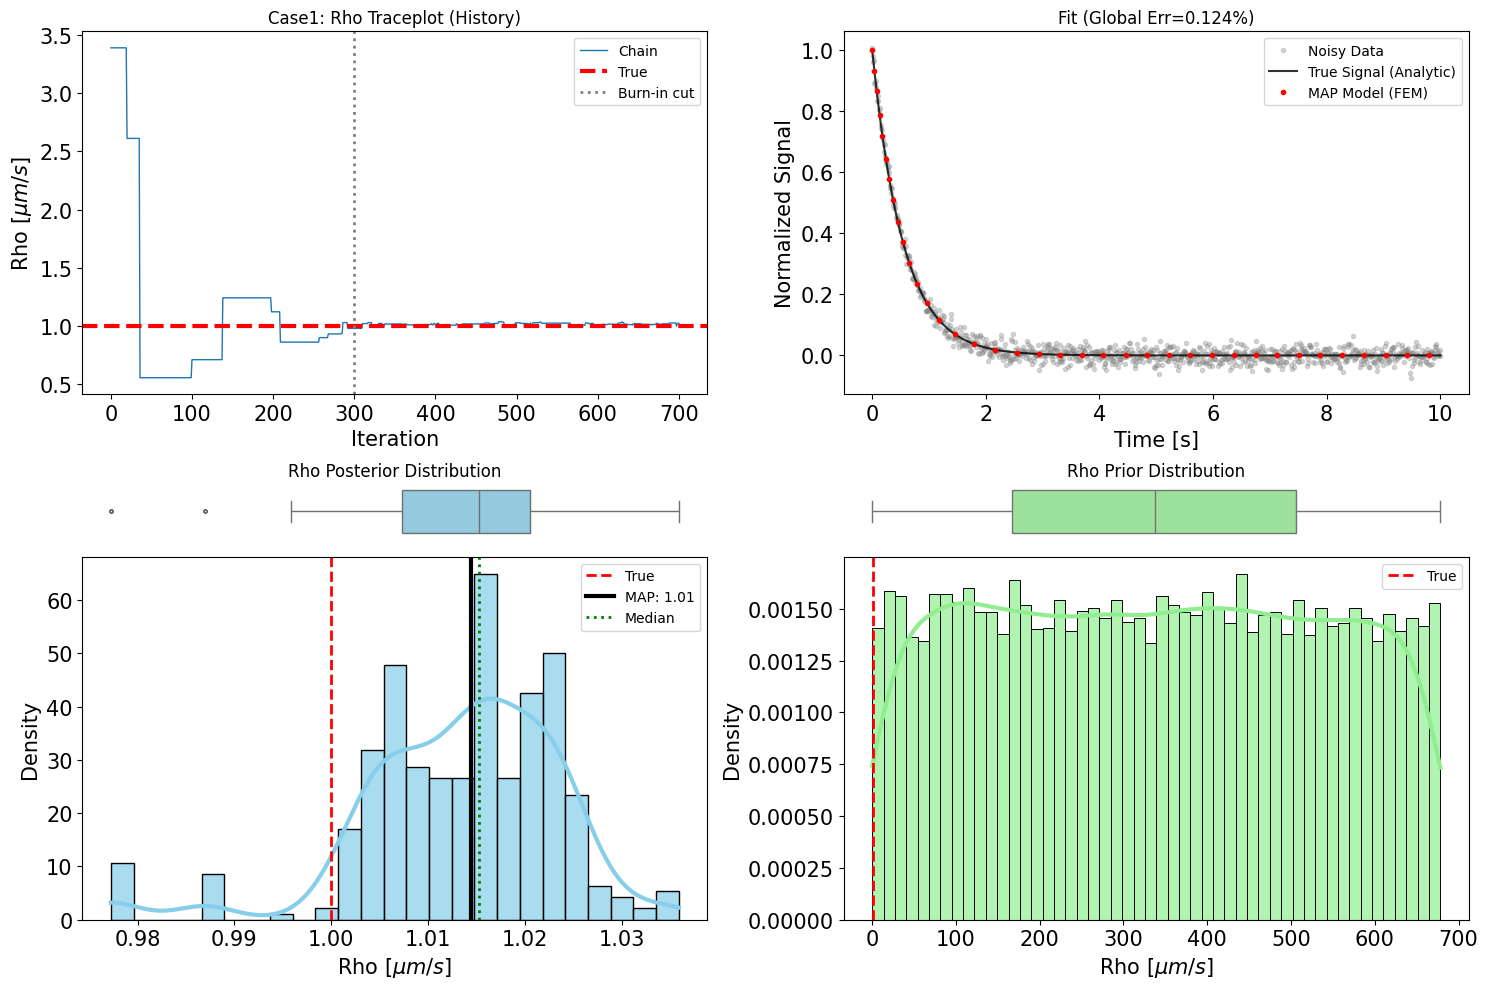

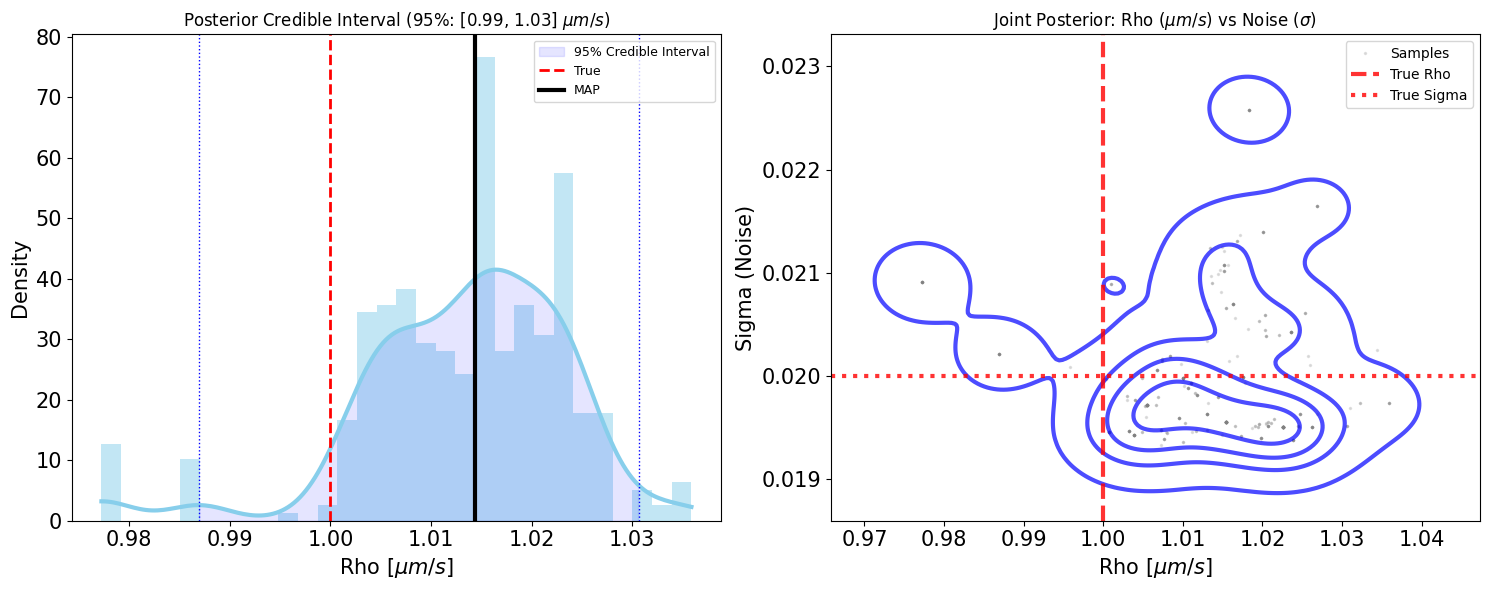

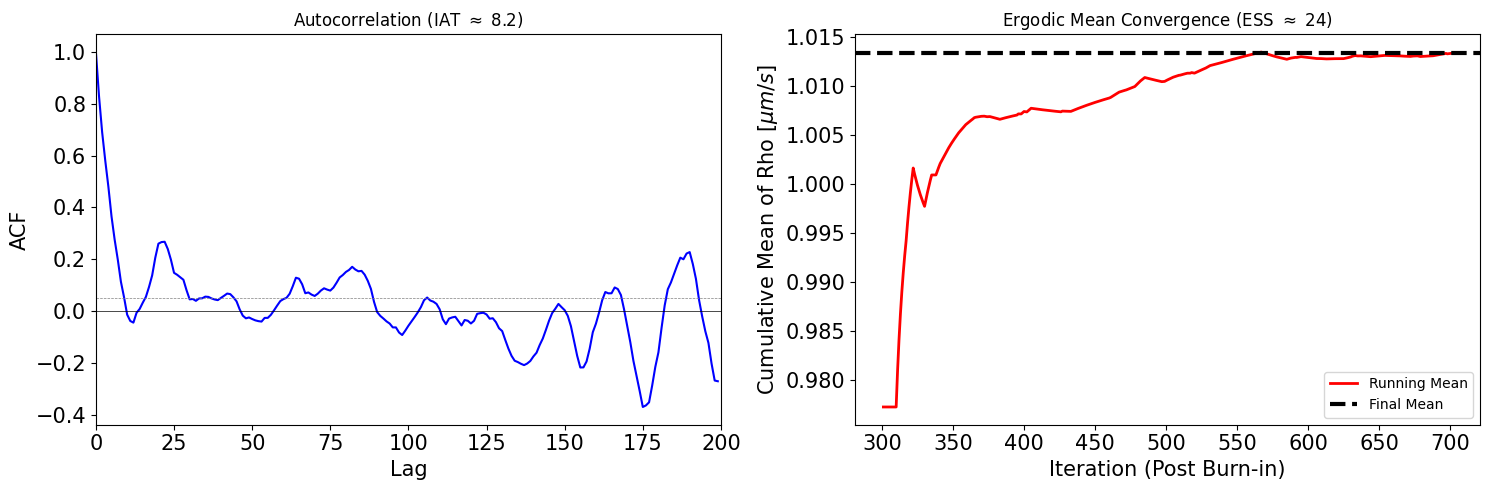

In [15]:
print('\n--- Processing Case1 ---')
data_case1 = load_case_data("Case1")

print("Min Rho detected:", np.min(data_case1["rho_chain_full"]))
print("Mean Rho (Post burn-in):", np.mean(data_case1["rho_chain_post"]))
print("Median Rho (Post burn-in):", np.median(data_case1["rho_chain_post"]))
print("Max Rho detected:", np.max(data_case1["rho_chain_full"]))

plot_case_dashboard(data_case1)


--- Processing Case3 ---
-> Loading Case3 from Google Colab Drive...
Min Rho detected: 3.3911649915626344e-06
Mean Rho (Post burn-in): 5.439089593851005e-05
Median Rho (Post burn-in): 5.452292720582706e-05
Max Rho detected: 6.797280638948319e-05


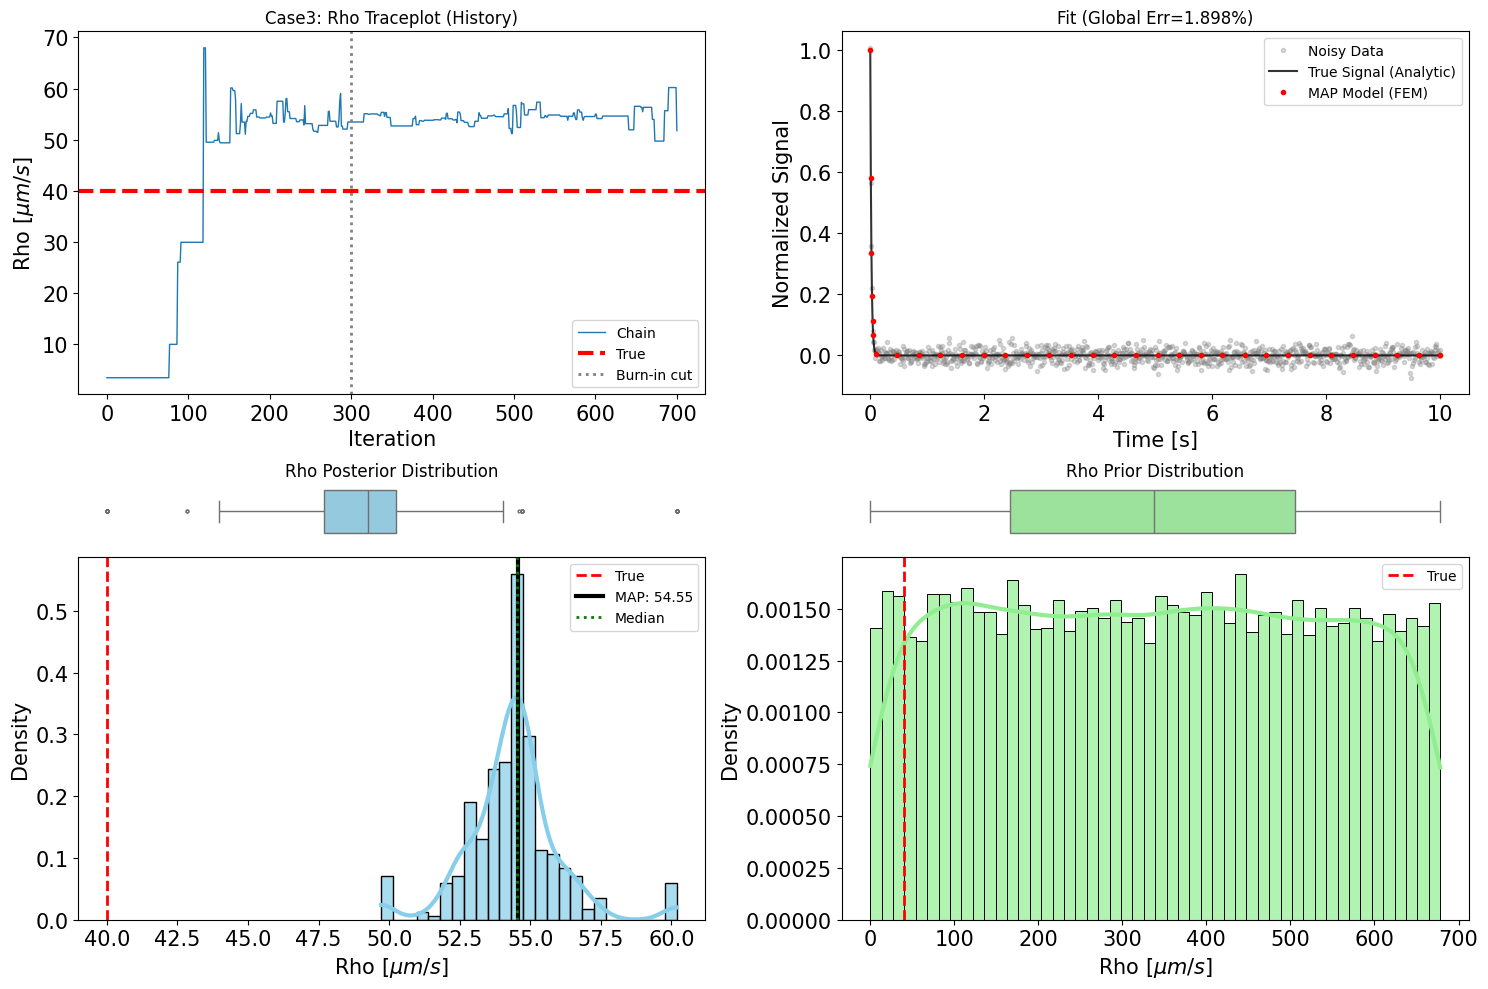

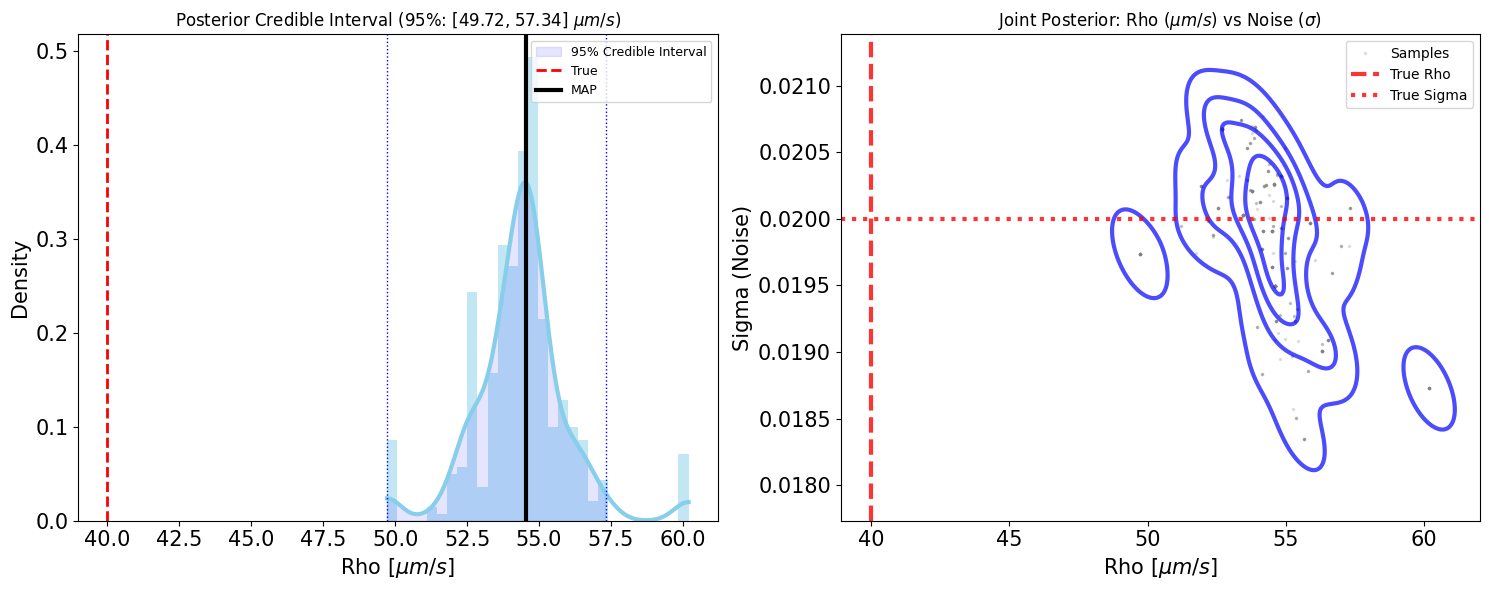

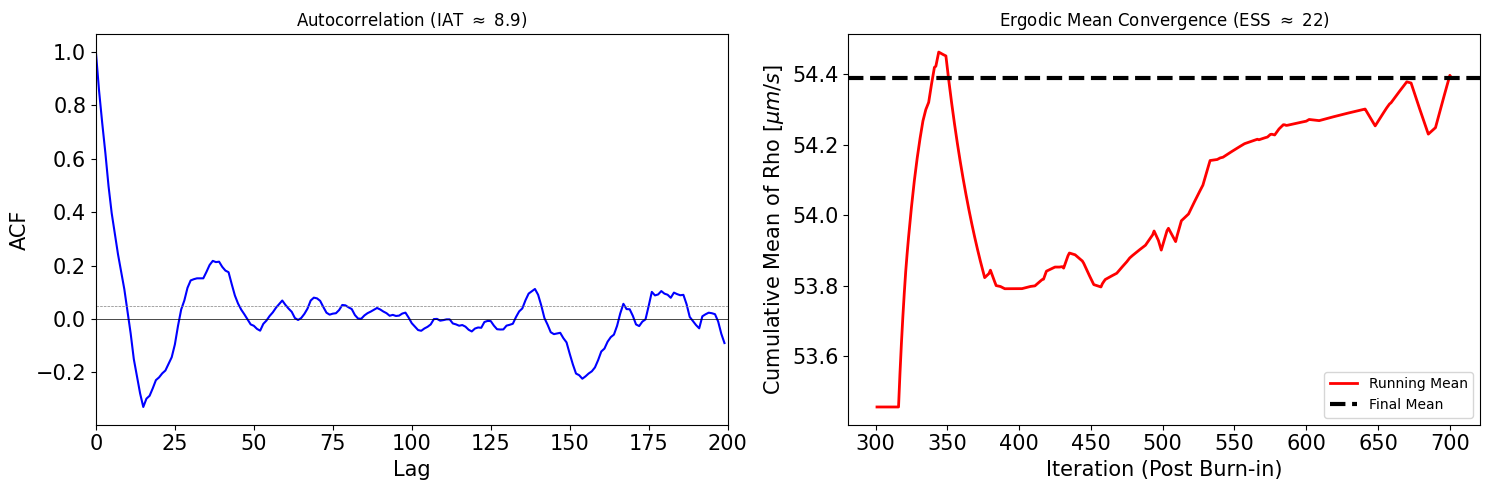

In [16]:
print('\n--- Processing Case3 ---')
data_case3 = load_case_data("Case3")

print("Min Rho detected:", np.min(data_case3["rho_chain_full"]))
print("Mean Rho (Post burn-in):", np.mean(data_case3["rho_chain_post"]))
print("Median Rho (Post burn-in):", np.median(data_case3["rho_chain_post"]))
print("Max Rho detected:", np.max(data_case3["rho_chain_full"]))

plot_case_dashboard(data_case3)


--- Processing Case5 ---
-> Loading Case5 from Google Colab Drive...
Min Rho detected: 3.3911649915626344e-06
Mean Rho (Post burn-in): 2.3558421278572794e-05
Median Rho (Post burn-in): 2.3413983032448335e-05
Max Rho detected: 4.476208809087839e-05


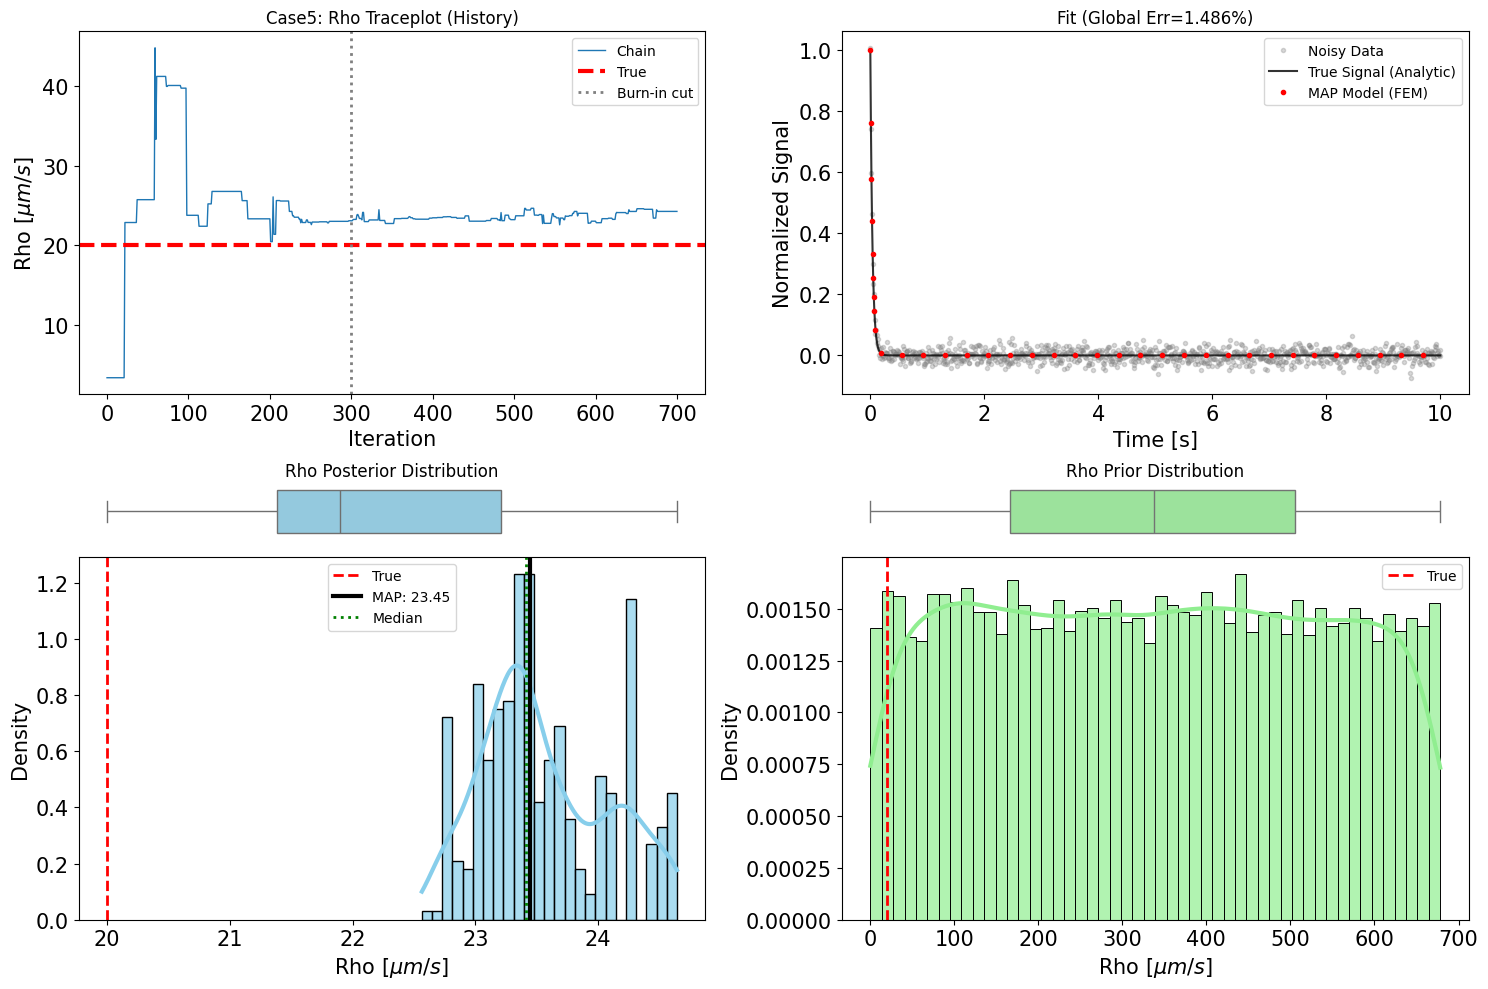

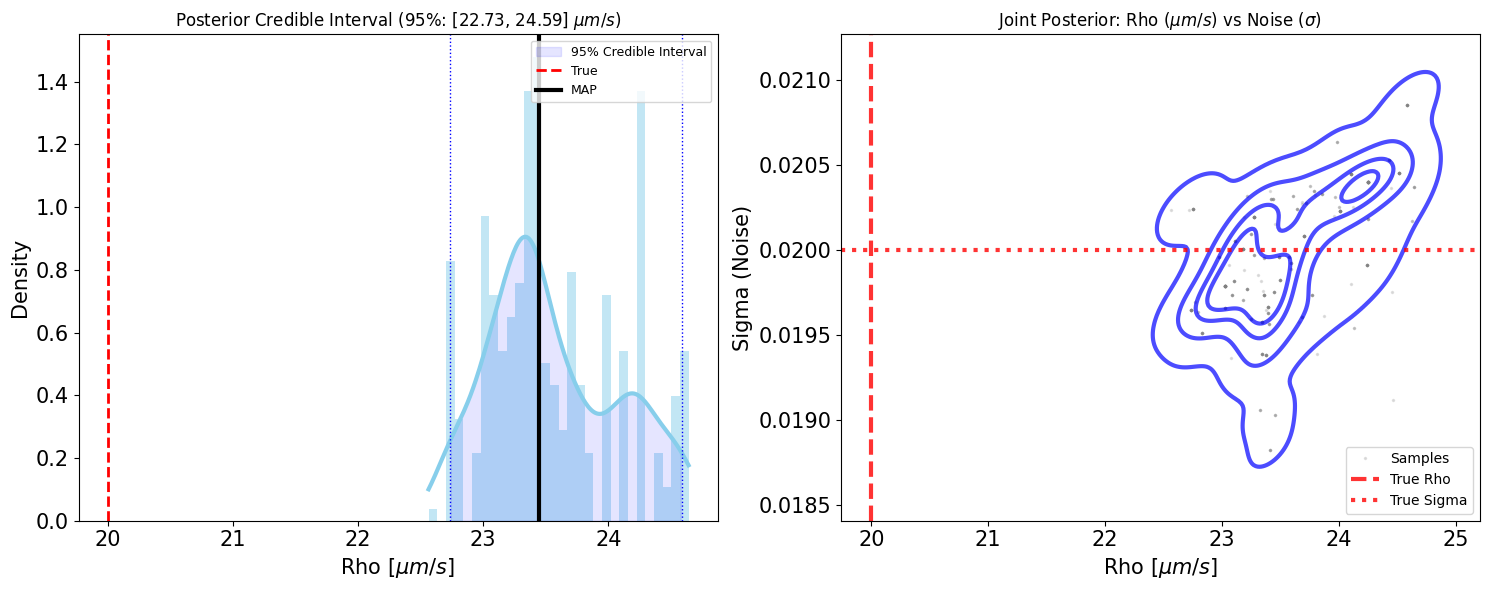

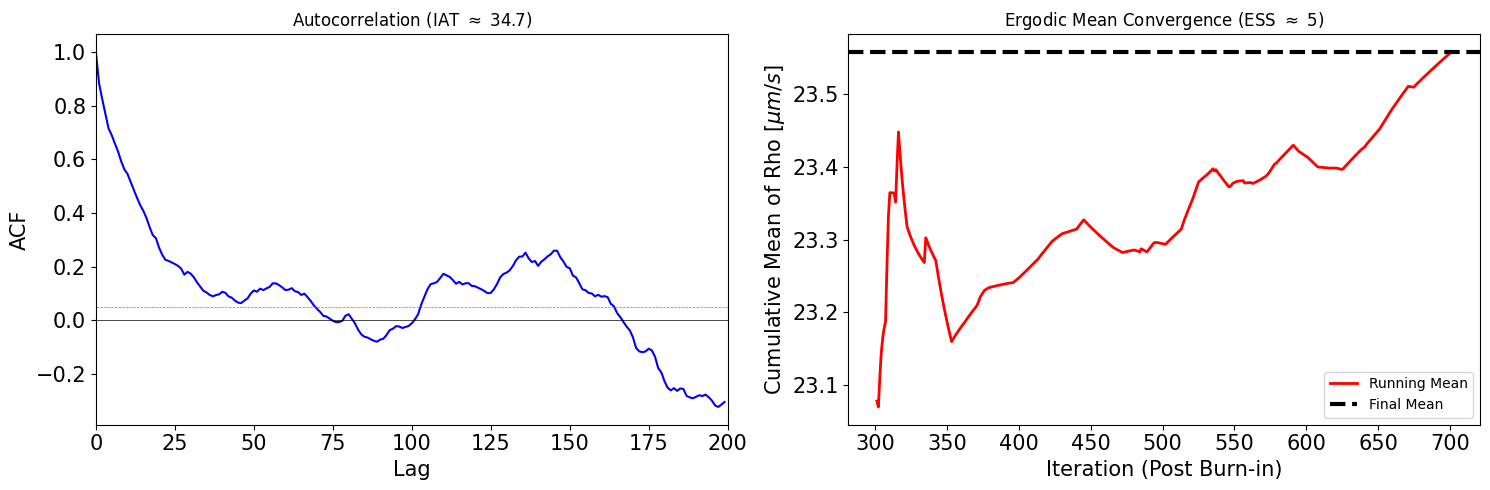

In [17]:
print('\n--- Processing Case5 ---')
data_case5 = load_case_data("Case5")

print("Min Rho detected:", np.min(data_case5["rho_chain_full"]))
print("Mean Rho (Post burn-in):", np.mean(data_case5["rho_chain_post"]))
print("Median Rho (Post burn-in):", np.median(data_case5["rho_chain_post"]))
print("Max Rho detected:", np.max(data_case5["rho_chain_full"]))

plot_case_dashboard(data_case5)


--- Processing Case2 ---
-> Loading Case2 from Google Colab Drive...
Min Rho detected: 7.408171161079071e-07
Mean Rho (Post burn-in): 1.0927403209154375e-06
Median Rho (Post burn-in): 1.0849429193246327e-06
Max Rho detected: 3.3911649915626344e-06


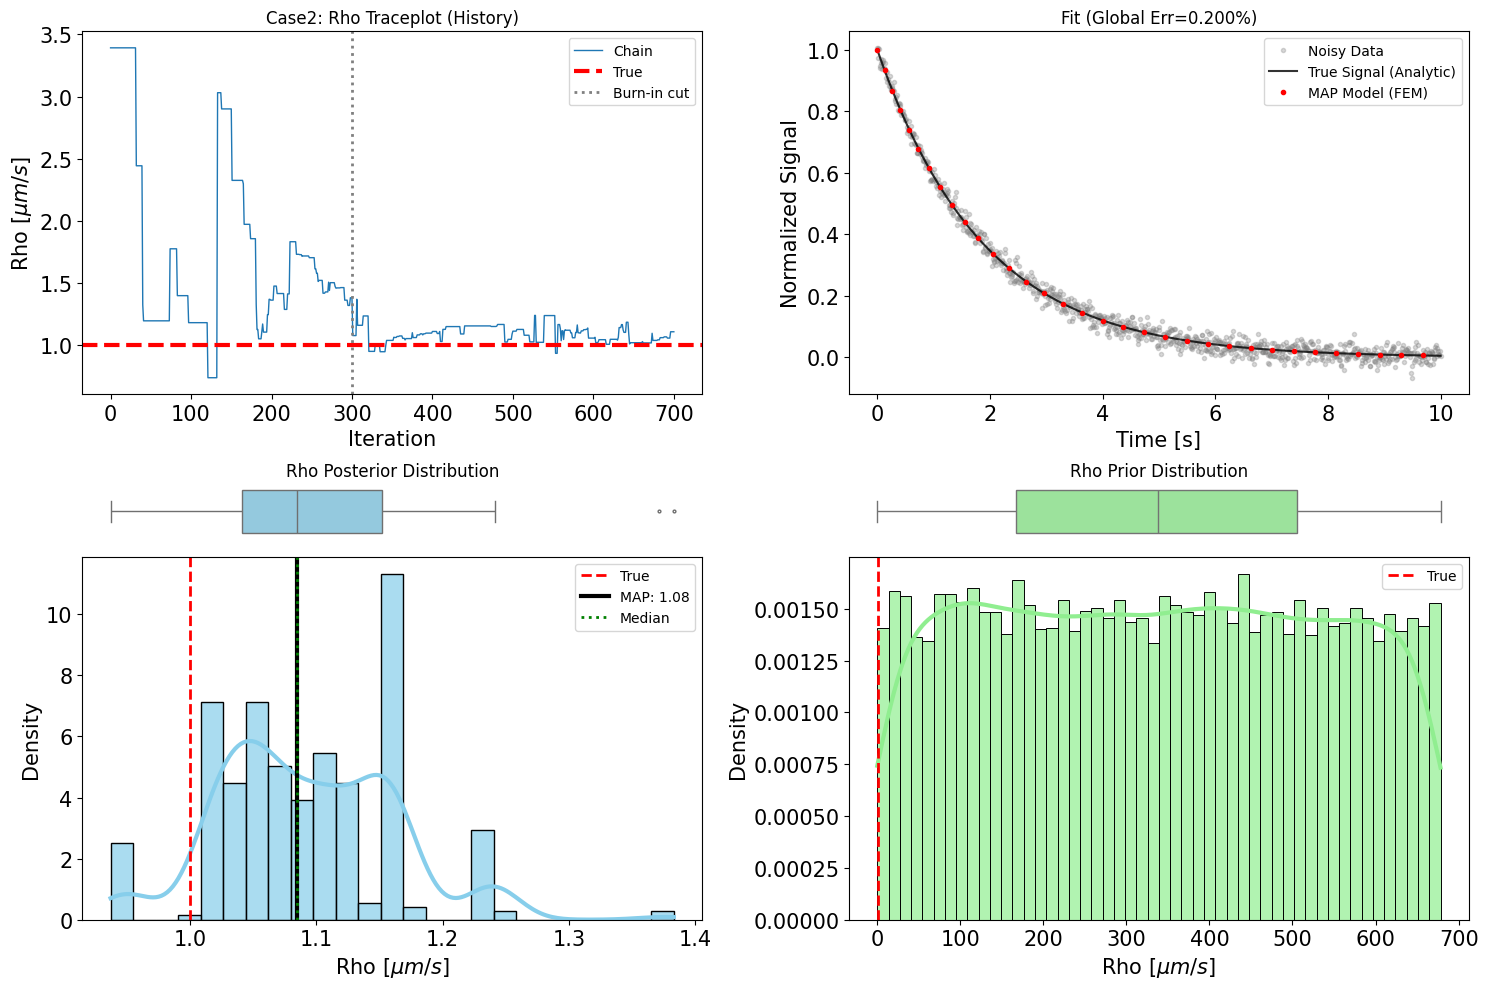

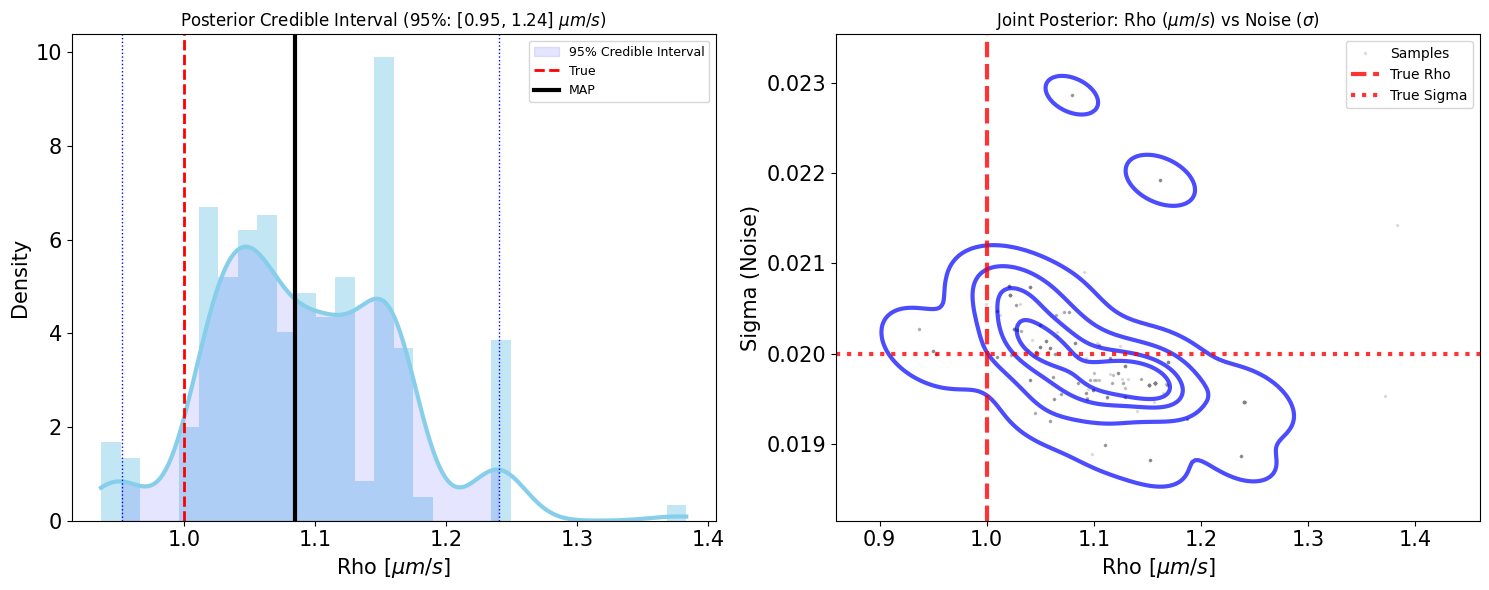

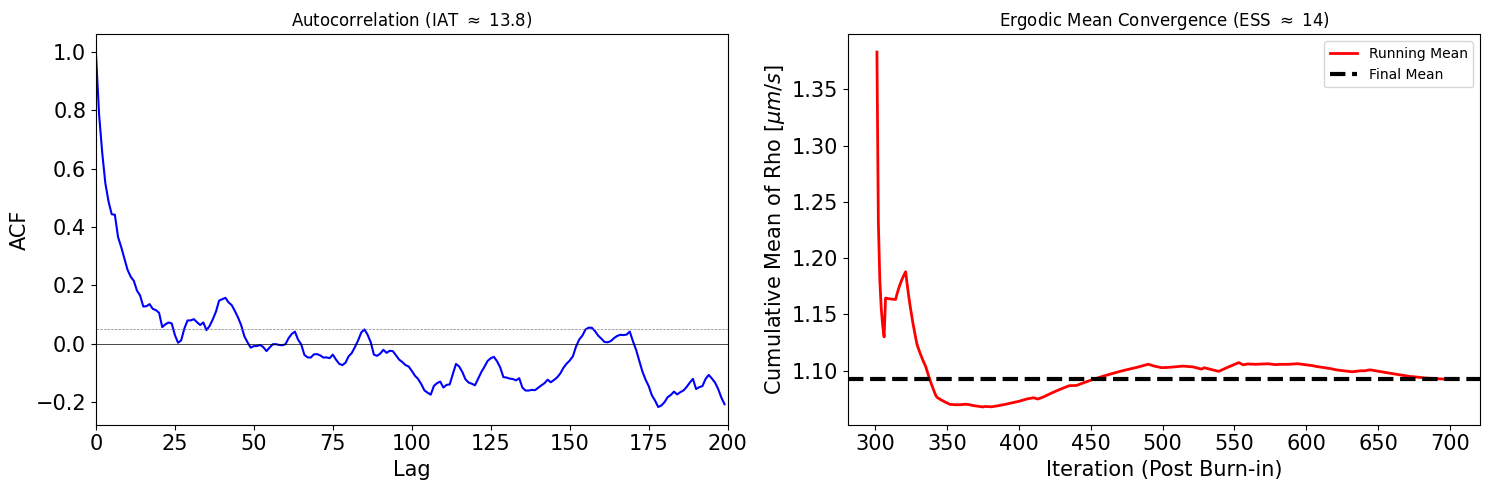

In [18]:
print('\n--- Processing Case2 ---')
data_case2 = load_case_data("Case2")

print("Min Rho detected:", np.min(data_case2["rho_chain_full"]))
print("Mean Rho (Post burn-in):", np.mean(data_case2["rho_chain_post"]))
print("Median Rho (Post burn-in):", np.median(data_case2["rho_chain_post"]))
print("Max Rho detected:", np.max(data_case2["rho_chain_full"]))

plot_case_dashboard(data_case2)


--- Processing Case4 ---
-> Loading Case4 from Google Colab Drive...
Min Rho detected: 3.3911649915626344e-06
Mean Rho (Post burn-in): 4.0845132699046534e-05
Median Rho (Post burn-in): 4.087311901510059e-05
Max Rho detected: 4.26547632476973e-05


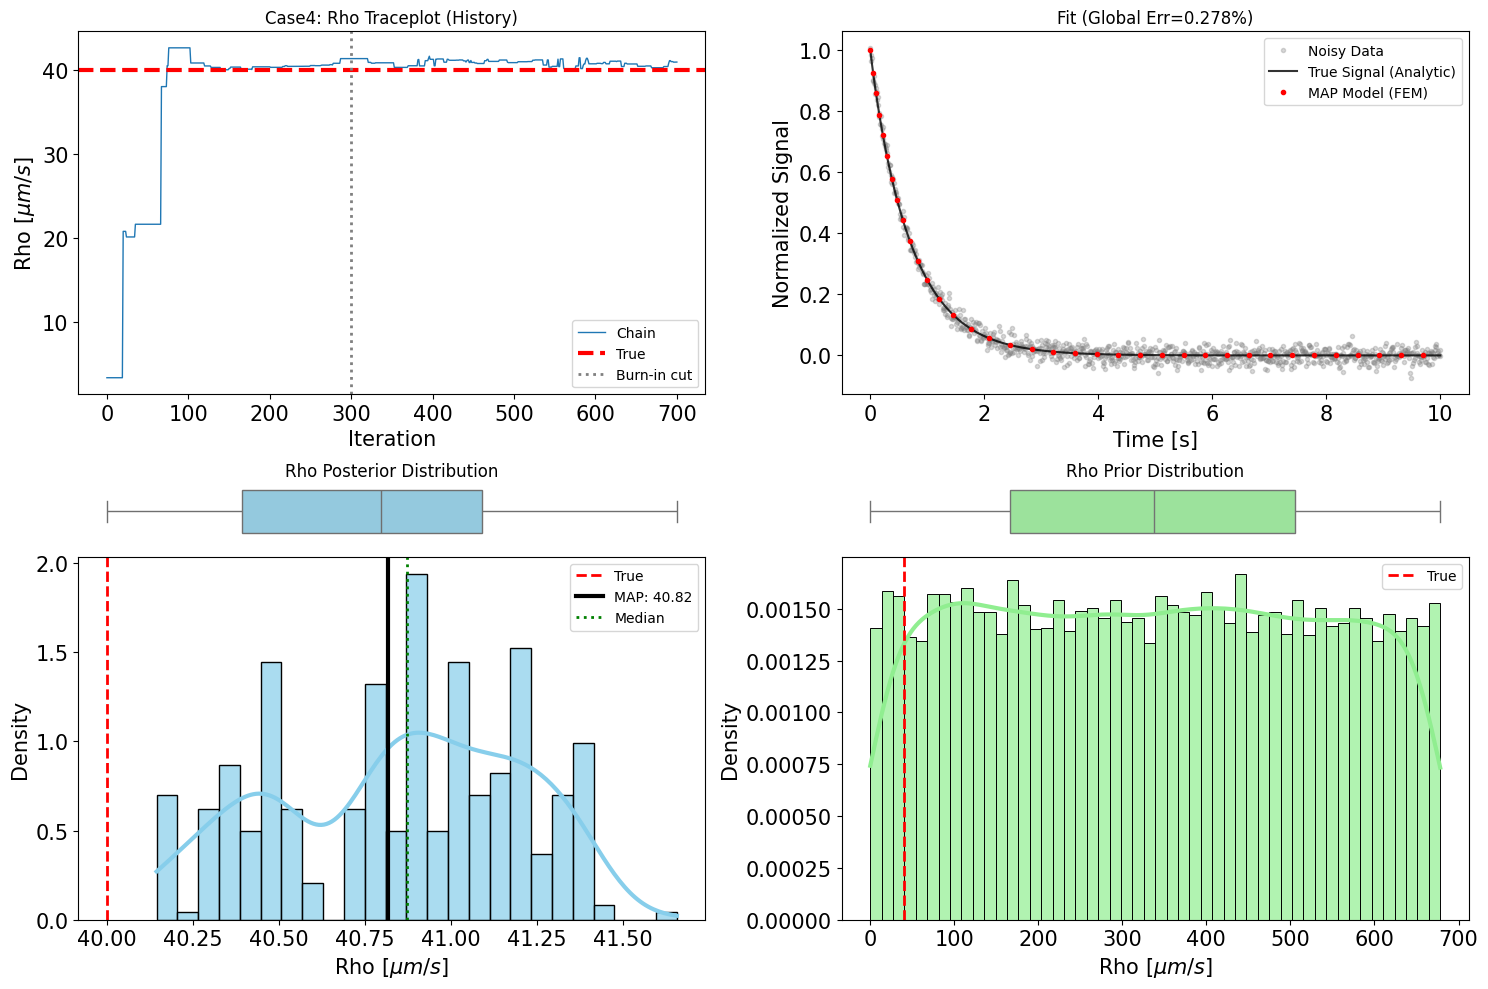

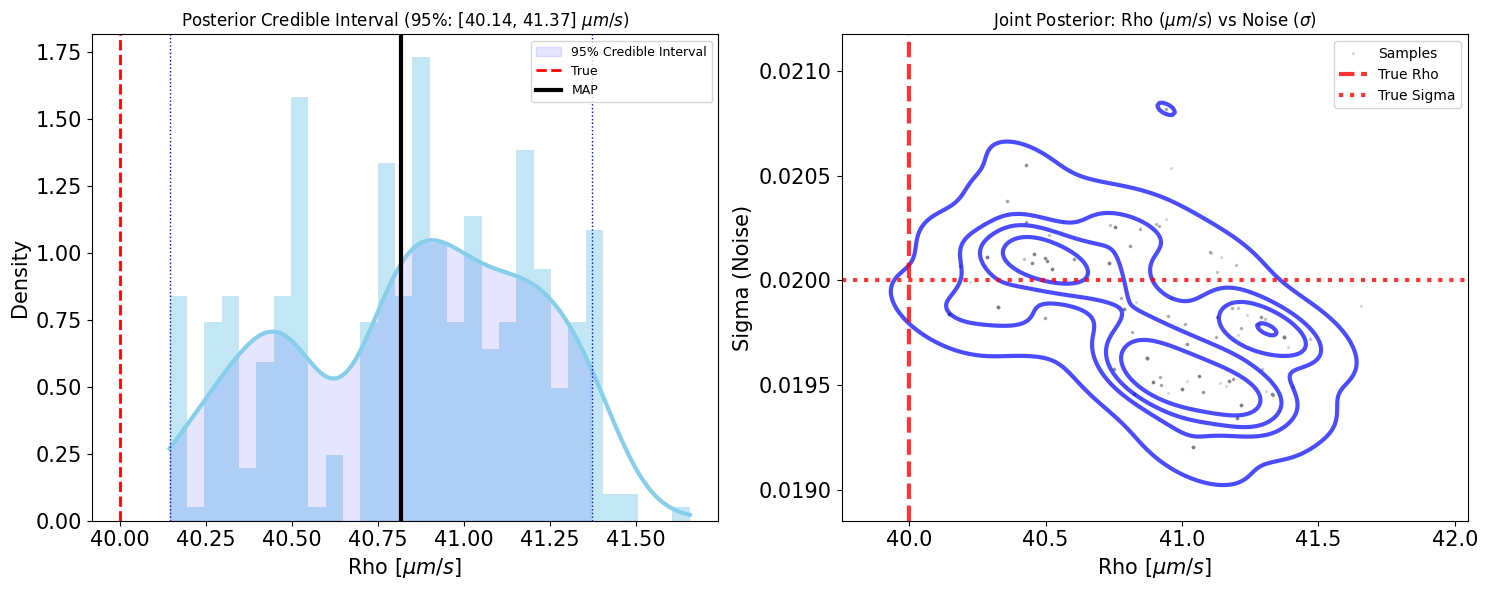

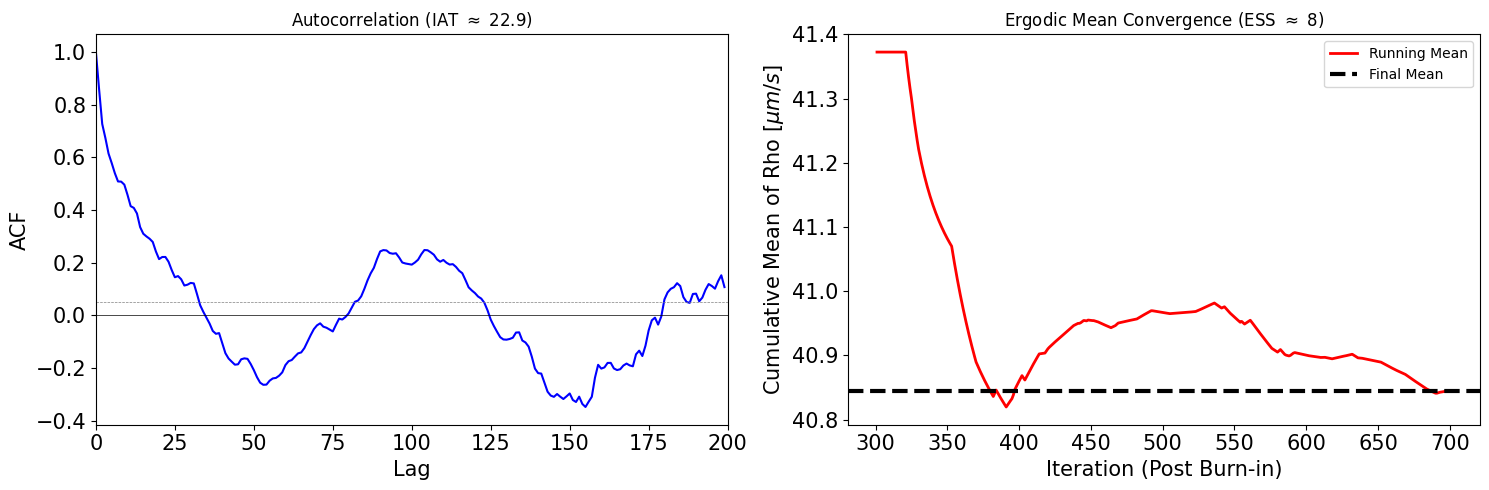

In [19]:
print('\n--- Processing Case4 ---')
data_case4 = load_case_data("Case4")

print("Min Rho detected:", np.min(data_case4["rho_chain_full"]))
print("Mean Rho (Post burn-in):", np.mean(data_case4["rho_chain_post"]))
print("Median Rho (Post burn-in):", np.median(data_case4["rho_chain_post"]))
print("Max Rho detected:", np.max(data_case4["rho_chain_full"]))

plot_case_dashboard(data_case4)


--- Processing Case6 ---
-> Loading Case6 from Google Colab Drive...
Min Rho detected: 3.3911649915626344e-06
Mean Rho (Post burn-in): 2.0318245870374083e-05
Median Rho (Post burn-in): 2.025871891802307e-05
Max Rho detected: 2.080154415520289e-05


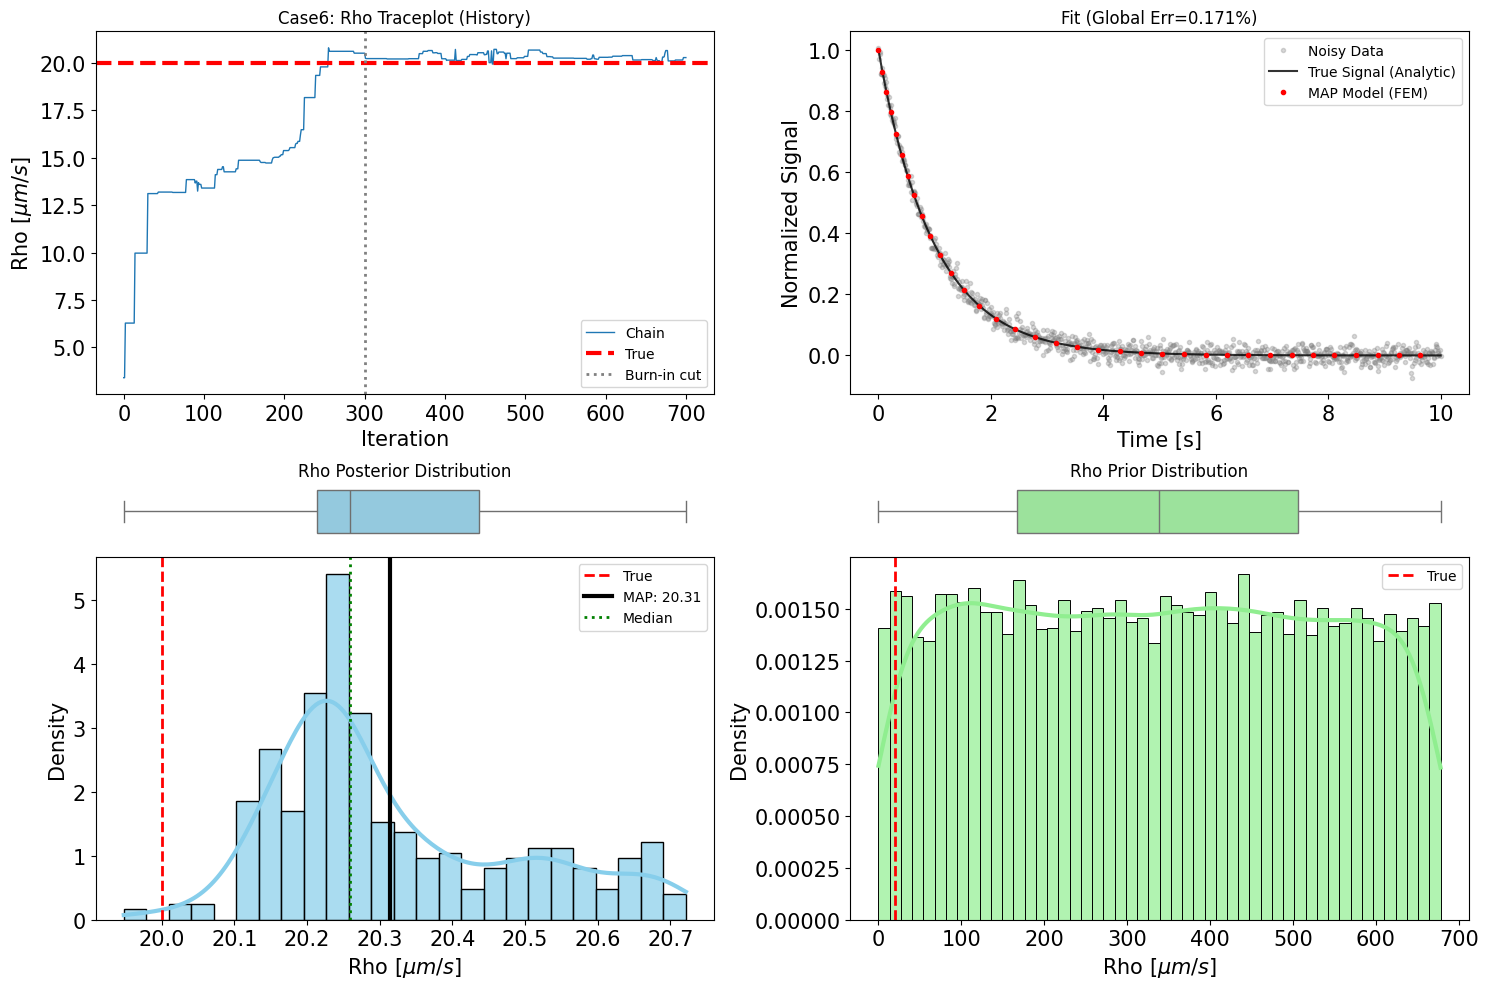

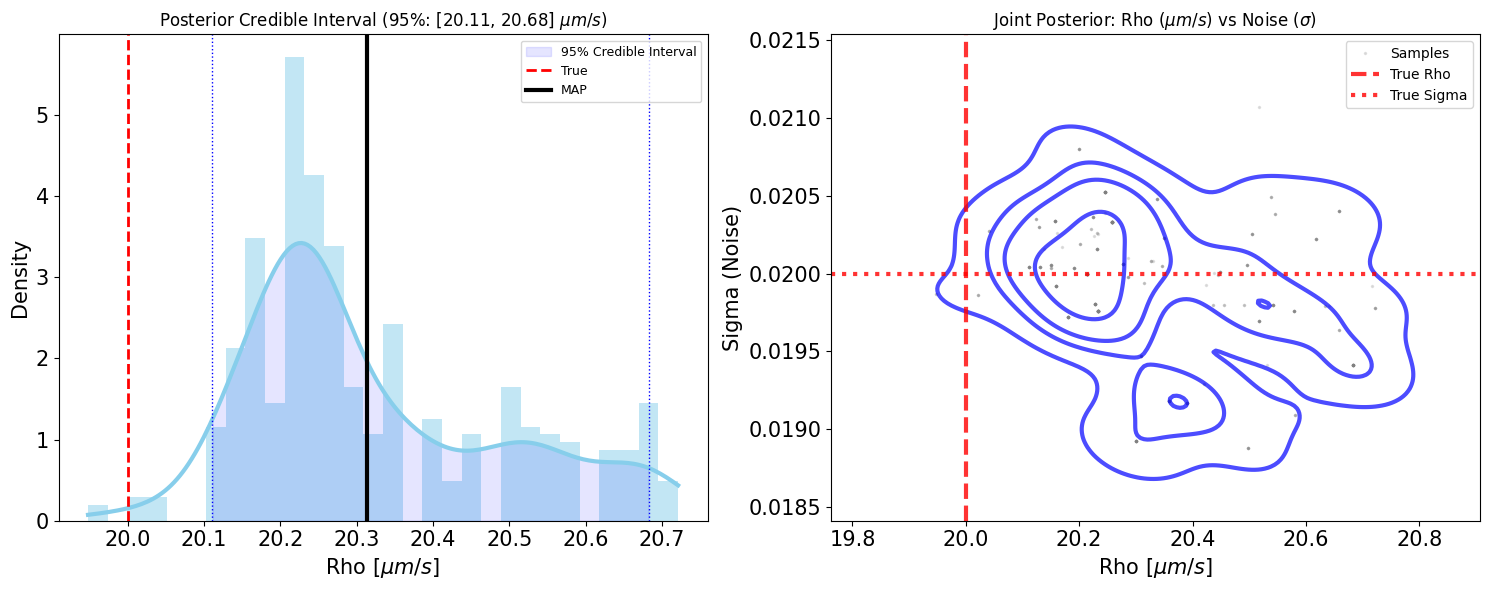

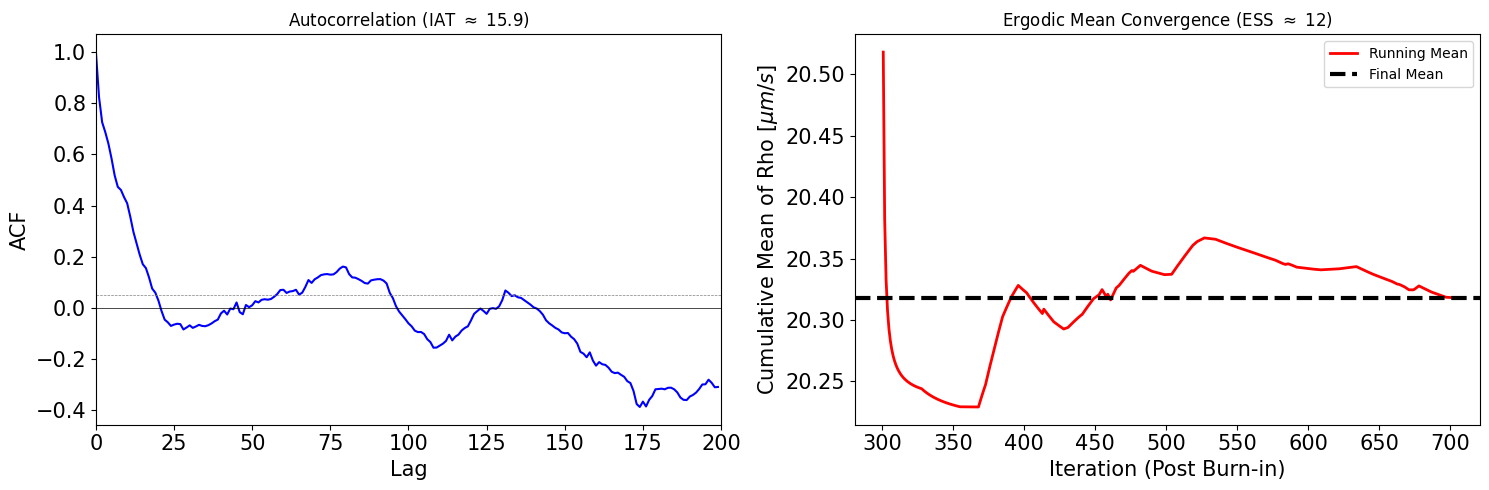

In [20]:
print('\n--- Processing Case6 ---')
data_case6 = load_case_data("Case6")

print("Min Rho detected:", np.min(data_case6["rho_chain_full"]))
print("Mean Rho (Post burn-in):", np.mean(data_case6["rho_chain_post"]))
print("Median Rho (Post burn-in):", np.median(data_case6["rho_chain_post"]))
print("Max Rho detected:", np.max(data_case6["rho_chain_full"]))

plot_case_dashboard(data_case6)